In [181]:
# HW2: EDA with csv data

## Import packages

import pandas as pd
import seaborn as sb
import cartopy as cp #graphing maps- not necessary in this data analysis but could be useful if handling hydrogeographic data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

#For statistical analysis
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from numpy.random import poisson
from scipy.stats import spearmanr

#skalearn is a machine learning library
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#Need to install bioinfokit
#! pip install bioinfokit
from bioinfokit.visuz import cluster


infile= 'International_Coastal_Cleanup.csv'
## Reading the CSV file
Data = pd.read_csv(infile, sep= ',', low_memory=False)

## displaying the contents of the CSV file
#print(Data)
Data

Area        Date  Cigarette Butts  \
0   East Ocean View (1300 - 1900 Block)  11/05/2022              655   
1                           Harbor Park  10/22/2022             1119   
2                        Lafayette Park  10/22/2022               44   
3                          Barraud Park  10/22/2022             1271   
4                Rosemont Middle School  10/20/2022               49   
..                                  ...         ...              ...   
64                       Oceanview Pier  09/30/2016              171   
65                Ocean View Beach Park  09/30/2016             3060   
66        East Oceanview Community Park  09/30/2016              323   
67               SPOT- Military Gardens  09/30/2016               63   
68                      Willoughby Spit  09/30/2016              386   

    Food Wrappers (candy, chips, etc.)  Take Out/Away Containers (Plastic)  \
0                                   49                                   3   
1                                  269                                  90   
2                                   18                                  58   
3                                  273                                  15   
4                                  133                                  15   
..                                 ...                                 ...   
64                                  95                                  14   
65                                 164                                  33   
66                                  43                                  20   
67                                   2                                   0   
68                                  59                                  41   

    Take Out/Away Containers (Foam)  Bottle Caps (Plastic)  \
0                                 5                     30   
1                                42                    354   
2                                11                     18   
3                                26                    742   
4                                10                    101   
..                              ...                    ...   
64                               13                     30   
65                                7                    294   
66                                3                     42   
67                                0                      9   
68                               25                    127   

    Bottle Caps (Metal)  Lids (Plastic)  Straws, Stirrers  ...  \
0                     8              13                21  ...   
1                    27              73               135  ...   
2                    10              14                 4  ...   
3                  1589               6                90  ...   
4                   111              28                23  ...   
..                  ...             ...               ...  ...   
64                    0              19                48  ...   
65                   30              18               108  ...   
66                    0               8                 5  ...   
67                    0               0                 2  ...   
68                    0              93               146  ...   

    Tampons/Tampon Applicators  Personal Hygiene (Clean Swell)  Foam Pieces  \
0                            0                               0           14   
1                            4                               6          218   
2                            0                              14            6   
3                            0                               6           96   
4                            0                              53           36   
..                         ...                             ...          ...   
64                           0                               1            0   
65                           2                               0 

In [182]:
# Size of data set
# How many variables?

Data.size

#There is 3657 different variables

3657

In [183]:
# How many samples/ data points? (rows)

Data.shape #rows, columns

#There is 69 samples, with 53 types of data points

(69, 53)

In [184]:
# Data type
Data.info()

#Non-null - says there is 69 for each row, so assuming there is no NaN values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 53 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Area                                       69 non-null     object 
 1   Date                                       69 non-null     object 
 2   Cigarette Butts                            69 non-null     int64  
 3   Food Wrappers (candy, chips, etc.)         69 non-null     int64  
 4   Take Out/Away Containers (Plastic)         69 non-null     int64  
 5   Take Out/Away Containers (Foam)            69 non-null     int64  
 6   Bottle Caps (Plastic)                      69 non-null     int64  
 7   Bottle Caps (Metal)                        69 non-null     int64  
 8   Lids (Plastic)                             69 non-null     int64  
 9   Straws, Stirrers                           69 non-null     int64  
 10  Forks, Knives, Spoons       

In [185]:
# Count the number of each different dtypes
Data.dtypes.value_counts()

#There is 47 int64, 4 float64, and 2 objects

int64      47
float64     4
object      2
dtype: int64

In [186]:
#Names of column variables
Data.columns


Index(['Area', 'Date', 'Cigarette Butts', 'Food Wrappers (candy, chips, etc.)',
       'Take Out/Away Containers (Plastic)', 'Take Out/Away Containers (Foam)',
       'Bottle Caps (Plastic)', 'Bottle Caps (Metal)', 'Lids (Plastic)',
       'Straws, Stirrers', 'Forks, Knives, Spoons',
       'Beverage Bottles (Plastic)', 'Beverage Bottles (Glass)',
       'Beverage Cans', 'Grocery Bags (Plastic)', 'Other Plastic Bags',
       'Paper Bags', 'Cups, Plates (Paper)', 'Cups, Plates (Plastic)',
       'Cups, Plates (Foam)', 'Fishing Buoys, Pots & Traps',
       'Fishing Net & Pieces', 'Fishing Line (1 yard/meter = 1 piece)',
       'Rope (1 yard/meter = 1 piece)', 'Fishing Gear (Clean Swell)',
       '6-Pack Holders', 'Other Plastic/Foam Packaging',
       'Other Plastic Bottles (oil, bleach, etc.)', 'Strapping Bands',
       'Tobacco Packaging/Wrap', 'Other Packaging (Clean Swell)',
       'Appliances (refrigerators, washers, etc.)', 'Balloons', 'Cigar Tips',
       'Cigarette Lighters', 'Co

In [187]:
#Set variables to make life easier/ I'm lazy
Area=Data['Area']
Date=Data['Date']
CigaretteButts=Data['Cigarette Butts']
FoodWrappers=Data['Food Wrappers (candy, chips, etc.)']
PlasticTakeOut=Data['Take Out/Away Containers (Plastic)']
FoamTakeOut=Data['Take Out/Away Containers (Foam)']
PlasticBottleCaps=Data['Bottle Caps (Plastic)']
MetalBottleCaps=Data['Bottle Caps (Metal)']
PlasticLids=Data['Lids (Plastic)']
Straw_Stirrers=Data['Straws, Stirrers']
Utensils=Data['Forks, Knives, Spoons']
PlasticBeverageBottle=Data['Beverage Bottles (Plastic)']
GlassBeverageBottle=Data['Beverage Bottles (Glass)']
BeverageCans=Data['Beverage Cans']
PlasticGroceryBags=Data['Grocery Bags (Plastic)']
OtherPlasticBags=Data['Other Plastic Bags']
PaperBags=Data['Paper Bags']
PaperCupPlates=Data['Cups, Plates (Paper)']
PlasticCupPlates=Data['Cups, Plates (Plastic)']
FoamCupPlates=Data['Cups, Plates (Foam)']
FishingBuoyPotTrap=Data['Fishing Buoys, Pots & Traps']
FishingNetPieces=Data['Fishing Net & Pieces']
FishingLine_1yd=Data['Fishing Line (1 yard/meter = 1 piece)']
Rope_1yd=Data['Rope (1 yard/meter = 1 piece)']
FishingGear_CleanSwell=Data['Fishing Gear (Clean Swell)']
SixPackHolders=Data['6-Pack Holders']
OtherPlasticFoamPackaging=Data['Other Plastic/Foam Packaging']
OtherPlasticBottles_OilBleach=Data['Other Plastic Bottles (oil, bleach, etc.)']
StrappingBands=Data['Strapping Bands']
TobacoPackagingWrap=Data['Tobacco Packaging/Wrap']
OtherPackaging_CleanSwell=Data['Other Packaging (Clean Swell)']
Appliances=Data['Appliances (refrigerators, washers, etc.)']
Ballons=Data['Balloons']
CigarTips=Data['Cigar Tips']
CigaretteLighters=Data['Cigarette Lighters']
ConstructionMaterials=Data['Construction Materials']
Fireworks=Data['Fireworks']
Tires=Data['Tires']
Toys=Data['Toys']
OtherTrash_CleanSwell=Data['Other Trash (Clean Swell)']
Condoms=Data['Condoms']
Diapers=Data['Diapers']
Syringes=Data['Syringes']
TamponsandApplicators=Data['Tampons/Tampon Applicators']
PersonalHygiene_CleanSwell=Data['Personal Hygiene (Clean Swell)']
FoamPieces=Data['Foam Pieces']
GlassPieces=Data['Glass Pieces']
PlasticPieces=Data['Plastic Pieces']
TotalItemsCollected=Data['Total Items Collected']
TotalPoundsofLitterCollected=Data['Total Pounds of Litter Collected']
VolunteerNumbers=Data['Number of Volunteers']
VolunteerHours=Data['Volunteer Hours']
NumberofMiles=Data['Number of Miles']

In [188]:
# Find missing data?

#NaN is no data
pd.isna(Data)

#There is no missing data (NaN) in the csv file, assuming that 0 is not missing. See 4th cell for more details
#Could also do a term search in excel for NaN value

Area   Date  Cigarette Butts  Food Wrappers (candy, chips, etc.)  \
0   False  False            False                               False   
1   False  False            False                               False   
2   False  False            False                               False   
3   False  False            False                               False   
4   False  False            False                               False   
..    ...    ...              ...                                 ...   
64  False  False            False                               False   
65  False  False            False                               False   
66  False  False            False                               False   
67  False  False            False                               False   
68  False  False            False                               False   

    Take Out/Away Containers (Plastic)  Take Out/Away Containers (Foam)  \
0                                False                            False   
1                                False                            False   
2                                False                            False   
3                                False                            False   
4                                False                            False   
..                                 ...                              ...   
64                               False                            False   
65                               False                            False   
66                               False                            False   
67                               False                            False   
68                               False                            False   

    Bottle Caps (Plastic)  Bottle Caps (Metal)  Lids (Plastic)  \
0                   False                False           False   
1                   False                False           False   
2                   False                False           False   
3                   False                False           False   
4                   False                False           False   
..                    ...                  ...             ...   
64                  False                False           False   
65                  False                False           False   
66                  False                False           False   
67                  False                False           False   
68                  False                False           False   

    Straws, Stirrers  ...  Tampons/Tampon Applicators  \
0              False  ...                       False   
1              False  ...                       False   
2              False  ...                       False   
3              False  ...                       False   
4              False  ...                       False   
..               ...  ...                         ...   
64             False  ...                       False   
65             False  ...                       False   
66             False  ...                       False   
67             False  ...                       False   
68             False  ...                       False   

    Personal Hygiene (Clean Swell)  Foam Pieces  Glass Pieces  Plastic Pieces  \
0                            False        False         False           False   
1                            False        False         False           False   
2                            False        False         False           False   
3                            False        False         False           False   
4                            False        False         False           False   
..                             ...          ...           ...             ...   
64                           False        False         False           False   
65                           False        False         False           False   
66                  

In [189]:
# Descriptive statistics

Data[['Total Items Collected', 'Total Pounds of Litter Collected',
       'Number of Volunteers', 'Volunteer Hours', 'Number of Miles']].agg(['std','mean','median','max','min'])

# Standard deviation, mean, median, and max of overall plots.
#There's lots of variation in the data, with drastic outliers, so need to plot to be able to visualize specific variations.

Total Items Collected  Total Pounds of Litter Collected  \
std               3551.589472                        397.070973   
mean              2149.456522                        216.231884   
median             876.000000                         90.000000   
max              20544.000000                       2545.000000   
min                  0.000000                          0.000000   

        Number of Volunteers  Volunteer Hours  Number of Miles  
std                28.556602        59.830099         1.540931  
mean               19.695652        39.384058         1.556232  
median             11.000000        20.000000         1.000000  
max               178.000000       396.000000        10.000000  
min                 0.000000         0.000000         0.000000

In [190]:
#Compare overall data and see trends (by area)
#Could use Principal Component Analysis (PCA)

#There is multiple repeats of areas- have to combine data together
GroupArea = Data.groupby('Area')
#GroupArea.first()

GroupArea2 = GroupArea[['Cigarette Butts','Food Wrappers (candy, chips, etc.)','Take Out/Away Containers (Plastic)',
                            'Take Out/Away Containers (Foam)','Bottle Caps (Plastic)','Bottle Caps (Metal)','Lids (Plastic)',
                            'Straws, Stirrers','Forks, Knives, Spoons','Beverage Bottles (Plastic)','Beverage Bottles (Glass)',
                            'Beverage Cans','Grocery Bags (Plastic)','Other Plastic Bags','Paper Bags','Cups, Plates (Paper)',
                            'Cups, Plates (Plastic)','Cups, Plates (Foam)','Fishing Buoys, Pots & Traps','Fishing Net & Pieces',
                            'Fishing Line (1 yard/meter = 1 piece)','Rope (1 yard/meter = 1 piece)','Fishing Gear (Clean Swell)',
                            '6-Pack Holders','Other Plastic/Foam Packaging','Other Plastic Bottles (oil, bleach, etc.)','Strapping Bands',
                            'Tobacco Packaging/Wrap','Other Packaging (Clean Swell)','Appliances (refrigerators, washers, etc.)','Balloons',
                            'Cigar Tips','Cigarette Lighters','Construction Materials','Fireworks','Tires','Toys','Other Trash (Clean Swell)',
                            'Condoms','Diapers','Syringes','Tampons/Tampon Applicators','Personal Hygiene (Clean Swell)','Foam Pieces',
                            'Glass Pieces','Plastic Pieces','Total Items Collected','Total Pounds of Litter Collected','Number of Volunteers',
                            'Volunteer Hours','Number of Miles']].agg('sum')
GroupAreaFinal = GroupArea2[list(GroupArea2.columns[~GroupArea2.columns.duplicated()])]
GroupAreaFinal

#Now combined! However some areas are still similar-without lat long & additional info, 
# it is hard to determine so we are assuming that groupby has already combined repeats with 100% certainty


Cigarette Butts  \
Area                                                                  
100 East Ocean View Ave                                         103   
Admiral Taussig Boulevard (Granby Street - East...               71   
Barraud Park                                                  11495   
Bay Dunes Drive                                                 126   
Bayview Elememtary                                               56   
Bayview Elementary/East Bayview Boulevard                       901   
Beach (21st Bay Street - 30th Bay Street)                       133   
Beach (Cottage Place Beach - North Beach View)                  439   
Community Beach Park                                             37   
Curlew Drive (Feeder Road - Light Rail Station)                   0   
East Ocean View                                                1134   
East Ocean View (1300 - 1800 Block)                            3060   
East Ocean View (1300 - 1900 Block)                             719   
East Ocean View Rec Center                                      133   
East Oceanview Community Park                                   441   
East Princess Anne Road (Park Avenue - Ballenti...                0   
Harbor Park                                                    1119   
Harbor Park (ERT)                                               998   
Lafayette Park                                                   44   
Lafayette Park & Lavalette Boat Ramp                            715   
Lakewood Park                                                   424   
Lambert's Point (ODU Service Learning Group)                   1003   
Lamberts Point                                                   68   
Norfolk Collegiate (Lafayette Park - Boat Ramp)                 618   
ODU/Lamberts Point                                               24   
Ocean View Beach                                                318   
Ocean View Beach Park                                          7932   
Oceanview Park (4th - 9th Street)                                 0   
Oceanview Pier                                                  171   
Old Dominion University                                         450   
Plum Point Park                                                  10   
Rosemont Middle School                                           49   
SPOT- Military Gardens                                           63   
Sarah Constance Beach Park                                        0   
The Hague                                                       496   
Tidewater (Little Creek - Bayview)                               56   
Town Point Park/ Nauticus                                       346   
Wetland (Poppe and Somee)                                       111   
Willoughby Spit                                                1649   

                                                    Food Wrappers (candy, chips, etc.)  \
Area                                                                                     
100 East Ocean View Ave                                                             17   
Admiral Taussig Boulevard (Granby Street - East...                                  34   
Barraud Park                                                                      3225   
Bay Dunes Drive                                                                     15   
Bayview Elememtary                                                                 233   
Bayview Elementary/East Bayview Boulevard                                          682   
Beach (21st Bay Street - 30th Bay Street)                                           53   
Beach (Cottage Place Beach - North Beach View)                                      95   
Community Beach Park                                                                 8   
Curlew Drive (Feeder Road - Light Rail Station)                                      0   
East Ocean View                                             

In [191]:
##PCA Analysis (for data visualization)
#Adapted from https://www.reneshbedre.com/blog/principal-component-analysis.html

## Standardize Data
# removes the biases in the original variables
# mean=0, variance=1

Variables_st =  StandardScaler().fit_transform(GroupAreaFinal)  
pd.DataFrame(Variables_st, columns=GroupAreaFinal.columns).head(5)

Cigarette Butts  Food Wrappers (candy, chips, etc.)  \
0        -0.372882                           -0.493596   
1        -0.387657                           -0.461901   
2         4.887217                            5.487497   
3        -0.362262                           -0.497325   
4        -0.394583                           -0.090879   

   Take Out/Away Containers (Plastic)  Take Out/Away Containers (Foam)  \
0                           -0.821472                        -0.606034   
1                           -0.821472                        -0.531631   
2                            2.586234                         4.130950   
3                           -0.746851                        -0.606034   
4                           -0.746851                        -0.482029   

   Bottle Caps (Plastic)  Bottle Caps (Metal)  Lids (Plastic)  \
0              -0.354202            -0.178100       -0.705941   
1              -0.370498            -0.182066       -0.480414   
2               5.821775             6.161522        3.249464   
3              -0.410072            -0.184269       -0.601851   
4              -0.342563            -0.180744       -0.532458   

   Straws, Stirrers  Forks, Knives, Spoons  Beverage Bottles (Plastic)  ...  \
0         -0.563175              -0.476666                   -0.604509  ...   
1         -0.486735              -0.434368                   -0.467667  ...   
2          4.927783               5.381606                    3.495850  ...   
3         -0.480365              -0.540113                   -0.604509  ...   
4         -0.461255              -0.370921                   -0.365036  ...   

   Tampons/Tampon Applicators  Personal Hygiene (Clean Swell)  Foam Pieces  \
0                   -0.615038                       -0.229924    -0.449288   
1                   -0.615038                       -0.232940    -0.449288   
2                   -0.262296                        6.107025     5.133664   
3                   -0.615038                       -0.232940    -0.449288   
4                   -0.615038                       -0.160552    -0.445440   

   Glass Pieces  Plastic Pieces  Total Items Collected  \
0     -0.312223       -0.313746              -0.367105   
1     -0.267965       -0.239912              -0.341066   
2      5.928272        6.008879               5.866516   
3     -0.312223       -0.310669              -0.367002   
4      0.090255       -0.245450              -0.289709   

   Total Pounds of Litter Collected  Number of Volunteers  Volunteer Hours  \
0                         -0.478496             -0.514748        -0.477652   
1                         -0.425706             -0.428514        -0.397616   
2                          4.873114              4.952456         5.397010   
3                         -0.425706             -0.549241        -0.485656   
4                         -0.471897             -0.152567        -0.141500   

   Number of Miles  
0        -0.815653  
1        -0.634665  
2         2.442133  
3        -0.634665  
4         1.537192  

[5 rows x 51 columns]

In [192]:
# PCA shenanigans

pca_output = PCA().fit(GroupAreaFinal)

# get the component variance
# Proportion of Variance (from PC1 to PC6)
pca_output.explained_variance_ratio_


# Cumulative proportion of variance (from PC1 to PC6)   
np.cumsum(pca_output.explained_variance_ratio_)

# component loadings or weights (correlation coefficient between original variables and the component) 
# component loadings represents the elements of the eigenvector
# the squared loadings within the PCs always sums to 1
loadings = pca_output.components_
num_pc = pca_output.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings= pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings['Variable'] = GroupAreaFinal.columns.values
loadings= loadings.set_index('Variable')
loadings.head(5)
# positive and negative values in component loadings reflects the positive and negative 
# correlation of the variables with the PCs. Except A and B, all other variables have 
# positive projection on first PC.

PC1       PC2       PC3       PC4  \
Variable                                                                     
Cigarette Butts                     0.188882  0.857230 -0.364060  0.162840   
Food Wrappers (candy, chips, etc.)  0.049462 -0.040830  0.141315 -0.193162   
Take Out/Away Containers (Plastic)  0.002425  0.011135  0.037691 -0.003720   
Take Out/Away Containers (Foam)     0.003098 -0.002745  0.036181  0.000250   
Bottle Caps (Plastic)               0.041136 -0.001810  0.010897  0.001046   

                                         PC5       PC6       PC7       PC8  \
Variable                                                                     
Cigarette Butts                     0.096933 -0.043218  0.083003 -0.067904   
Food Wrappers (candy, chips, etc.)  0.353871  0.563127  0.581115 -0.108252   
Take Out/Away Containers (Plastic) -0.023247  0.017674 -0.061885  0.100239   
Take Out/Away Containers (Foam)    -0.039580  0.019331 -0.037869 -0.018860   
Bottle Caps (Plastic)              -0.116917  0.123408  0.135732  0.156365   

                                         PC9      PC10  ...      PC30  \
Variable                                                ...             
Cigarette Butts                    -0.025493 -0.006979  ... -0.024763   
Food Wrappers (candy, chips, etc.) -0.139936 -0.260401  ... -0.034379   
Take Out/Away Containers (Plastic)  0.033261  0.130851  ...  0.006128   
Take Out/Away Containers (Foam)     0.036963  0.014893  ... -0.423316   
Bottle Caps (Plastic)               0.677380  0.191140  ...  0.130464   

                                        PC31      PC32      PC33      PC34  \
Variable                                                                     
Cigarette Butts                     0.023159  0.075263 -0.004195 -0.059026   
Food Wrappers (candy, chips, etc.)  0.012352  0.084274  0.003661 -0.051389   
Take Out/Away Containers (Plastic)  0.026604  0.089219  0.046434 -0.145961   
Take Out/Away Containers (Foam)     0.154937  0.210752 -0.111555 -0.044566   
Bottle Caps (Plastic)              -0.045554  0.036388 -0.057177 -0.179569   

                                        PC35      PC36      PC37      PC38  \
Variable                                                                     
Cigarette Butts                    -0.017671  0.019204 -0.011410  0.015487   
Food Wrappers (candy, chips, etc.) -0.037083  0.020431 -0.013369 -0.003026   
Take Out/Away Containers (Plastic) -0.110176  0.017709  0.000130 -0.015456   
Take Out/Away Containers (Foam)    -0.058940  0.000799 -0.018541 -0.205379   
Bottle Caps (Plastic)              -0.081784  0.059035  0.099889 -0.019307   

                                        PC39  
Variable                                      
Cigarette Butts                    -0.052913  
Food Wrappers (candy, chips, etc.) -0.055397  
Take Out/Away Containers (Plastic) -0.125465  
Take Out/Away Containers (Foam)    -0.174075  
Bottle Caps (Plastic)              -0.097265  

[5 rows x 39 columns]

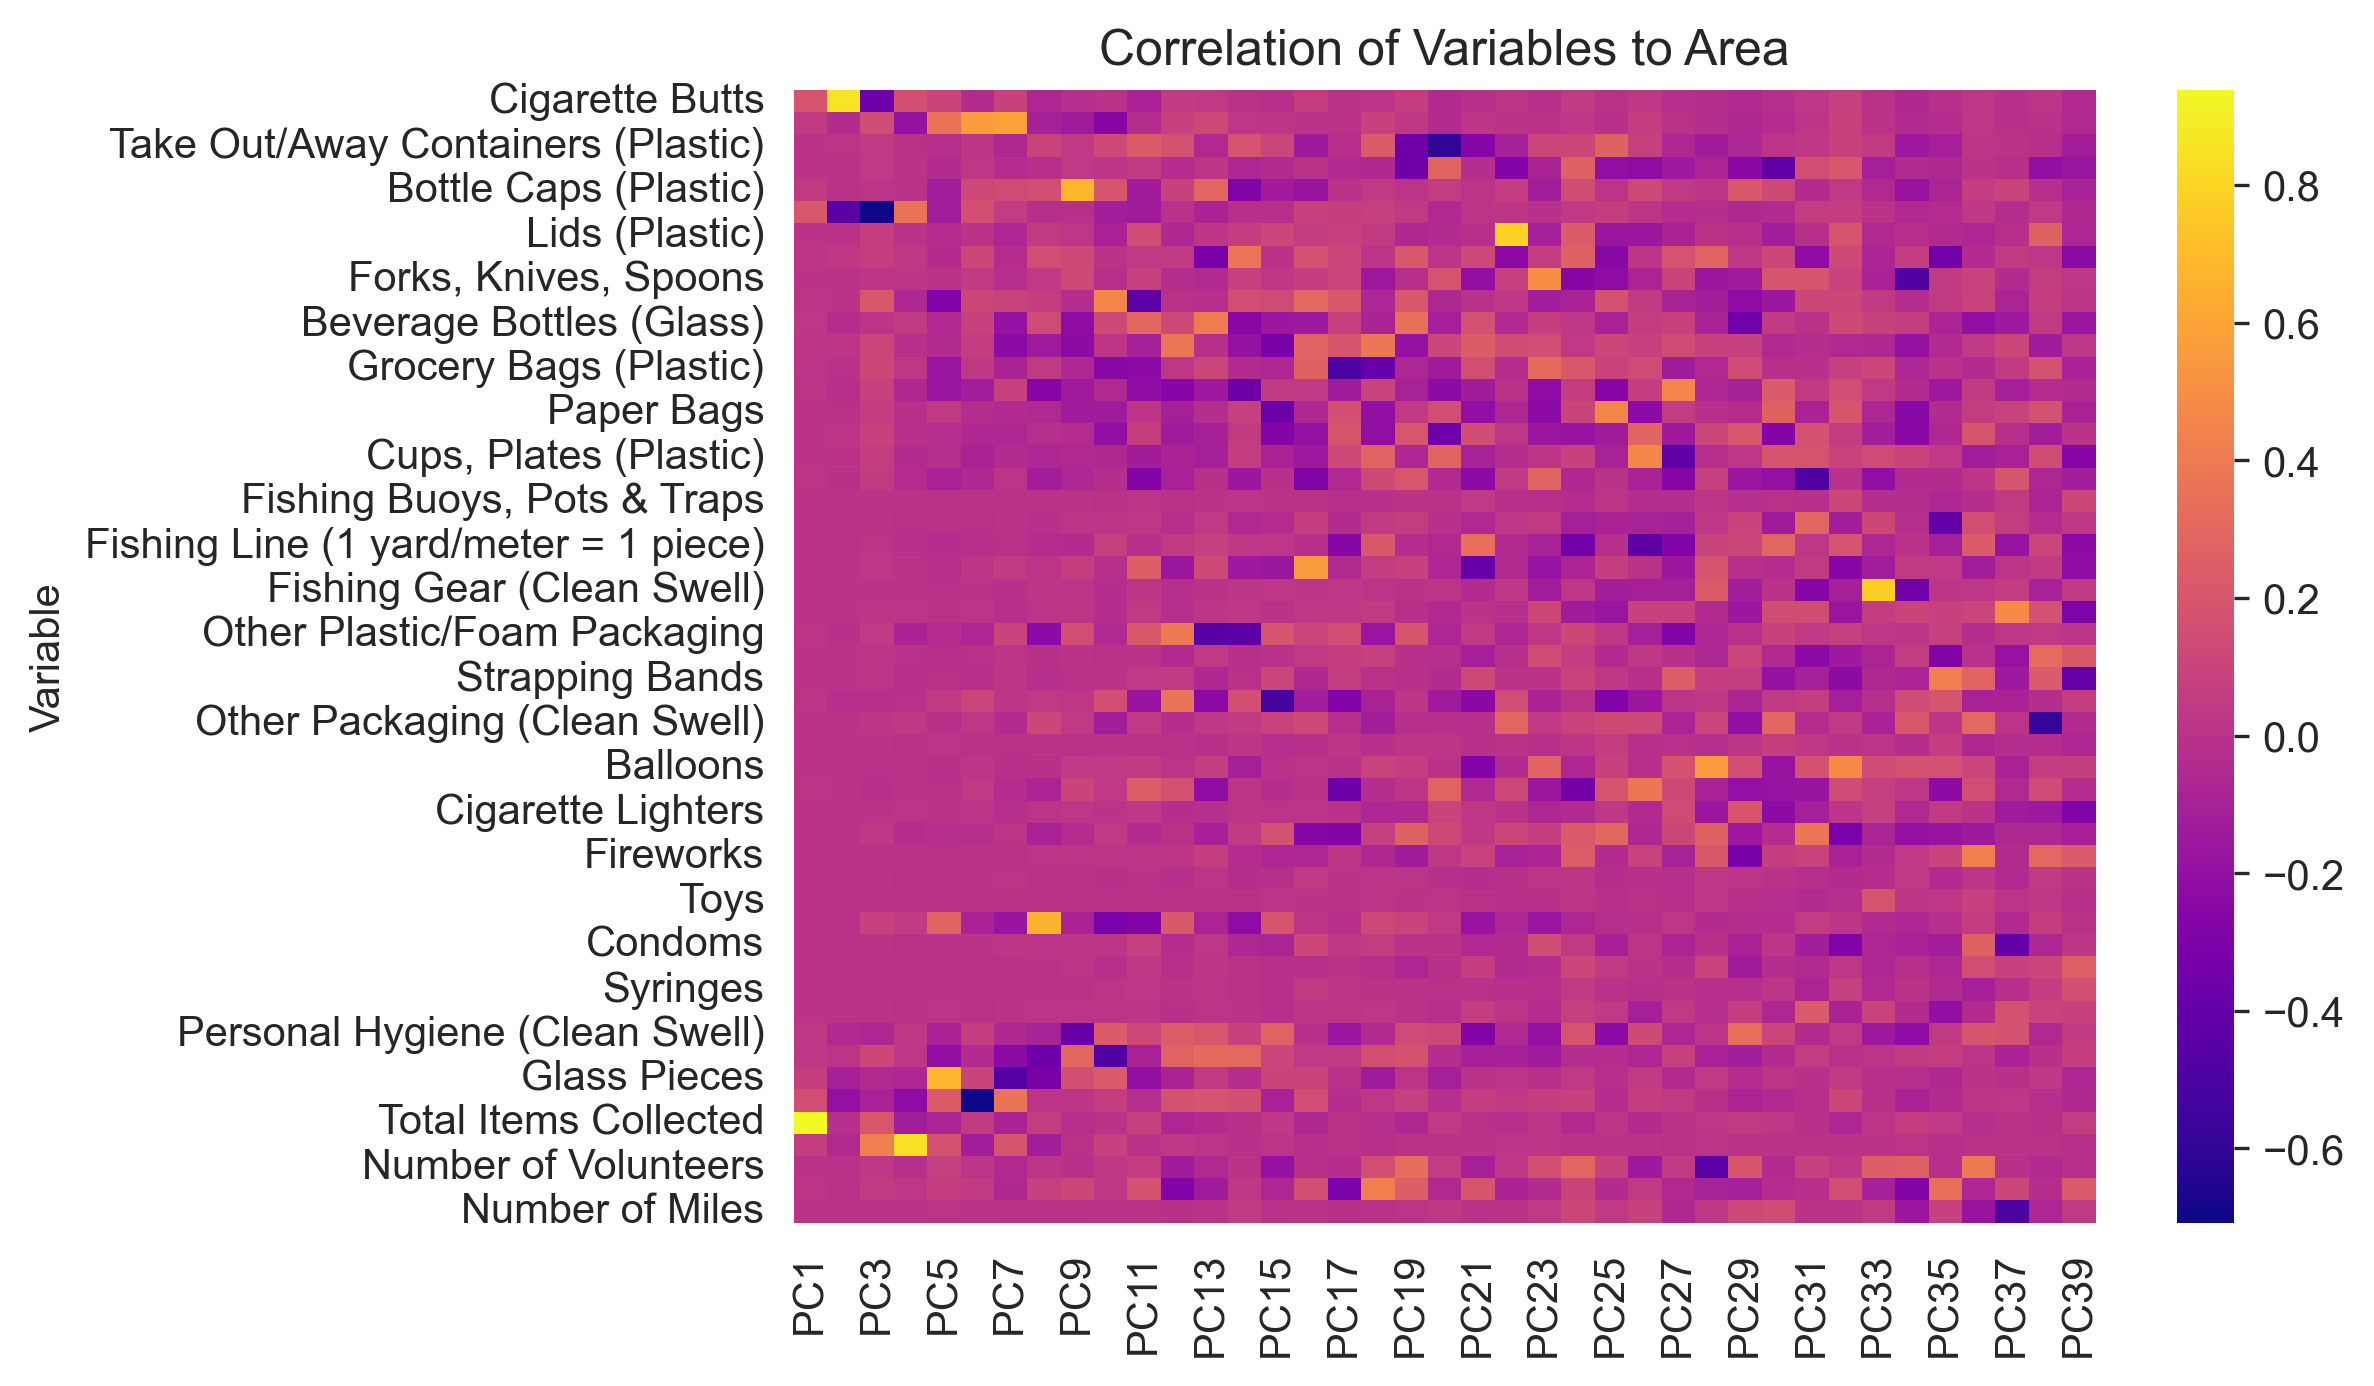

In [193]:
# get correlation matrix plot for loadings
plt.figure(figsize=(7,5),dpi=300)
ax = sb.heatmap(loadings, annot=False, cmap='plasma')
#change annot to True to see values
#plt.savefig("Correlationmatrix.png", dpi=600)
plt.title('Correlation of Variables to Area')
plt.show()

# Number of PCs is = to the # of original variables. 
# We should only keep the PCs that explain the most variance to make the interpretation easier.  
# The more the PCs explain variances the better the PCA model will be.
# Typically around 70-95% is perfect

In [194]:
# Eignvalues
# The eigenvalues (variance explained by each PC) for PCs can help to retain the number of PCs. 
# PCs with eigenvalues > 1 contributes greater variance and should be retained for further analysis
# Scree plot (for elbow test) is another graphical technique useful in PCs retention. 
#We should keep the PCs where there is a sharp change in the slope of the line connecting adjacent PCs.
pca_output.explained_variance_


# Screeplot/elbowtest
#cluster.screeplot(obj=[pc_list[0:38], pca_output.explained_variance_ratio_[0:38]])

# Scree plot will be saved in the same directory with name screeplot.png
# PC1 looks decent- that explains the majority of variability (weird- could be bc there is not enough data)

array([1.10128524e+08, 1.13444999e+06, 3.60180682e+05, 1.13983361e+05,
       3.57541361e+04, 1.50803573e+04, 8.65954930e+03, 5.30816624e+03,
       3.79368956e+03, 2.07564634e+03, 1.32771326e+03, 9.37193185e+02,
       7.63237289e+02, 5.98214788e+02, 4.32294913e+02, 3.53934227e+02,
       2.57733272e+02, 1.81555668e+02, 1.59680469e+02, 1.08682337e+02,
       7.74136614e+01, 5.96404572e+01, 4.75462526e+01, 2.62371815e+01,
       2.18117288e+01, 2.03669878e+01, 1.37986519e+01, 9.49939702e+00,
       8.26056413e+00, 4.89331061e+00, 3.69308103e+00, 3.06528331e+00,
       1.49092423e+00, 1.21671797e+00, 1.01149781e+00, 3.61546593e-01,
       1.08380806e-24, 1.08380806e-24, 1.08380806e-24])

In [195]:
#PCA Plotting

pipeline = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=2)),])

pca_data = pd.DataFrame(
    pipeline.fit_transform(GroupAreaFinal), #Drop the cruise/x-variable
    columns=["PC1", "PC2"],
    index=GroupAreaFinal.index)

pca_step = pipeline.steps[1][1]
loadings = pd.DataFrame(
    pca_step.components_.T,
    columns=["PC1", "PC2"],
    index=GroupAreaFinal.columns)

In [196]:
#Function for plotting PCA arrows
def loading_plot(
    coeff, labels, scale=1, colors=None, visible=None, ax=plt, arrow_size=0.5
):
    for i, label in enumerate(labels):
        if visible is None or visible[i]:
            ax.arrow(
                0,
                0,
                coeff[i, 0] * scale,
                coeff[i, 1] * scale,
                head_width=arrow_size * scale,
                head_length=arrow_size * scale,
                color="black" if colors is None else colors[i],
            )
            ax.text(
                coeff[i, 0] * 1.15 * scale,
                coeff[i, 1] * 1.15 * scale,
                label,
                #Adjust me to edit variable text
                color="red" if colors is None else colors[i],
                ha="center",
                va="top",
            )

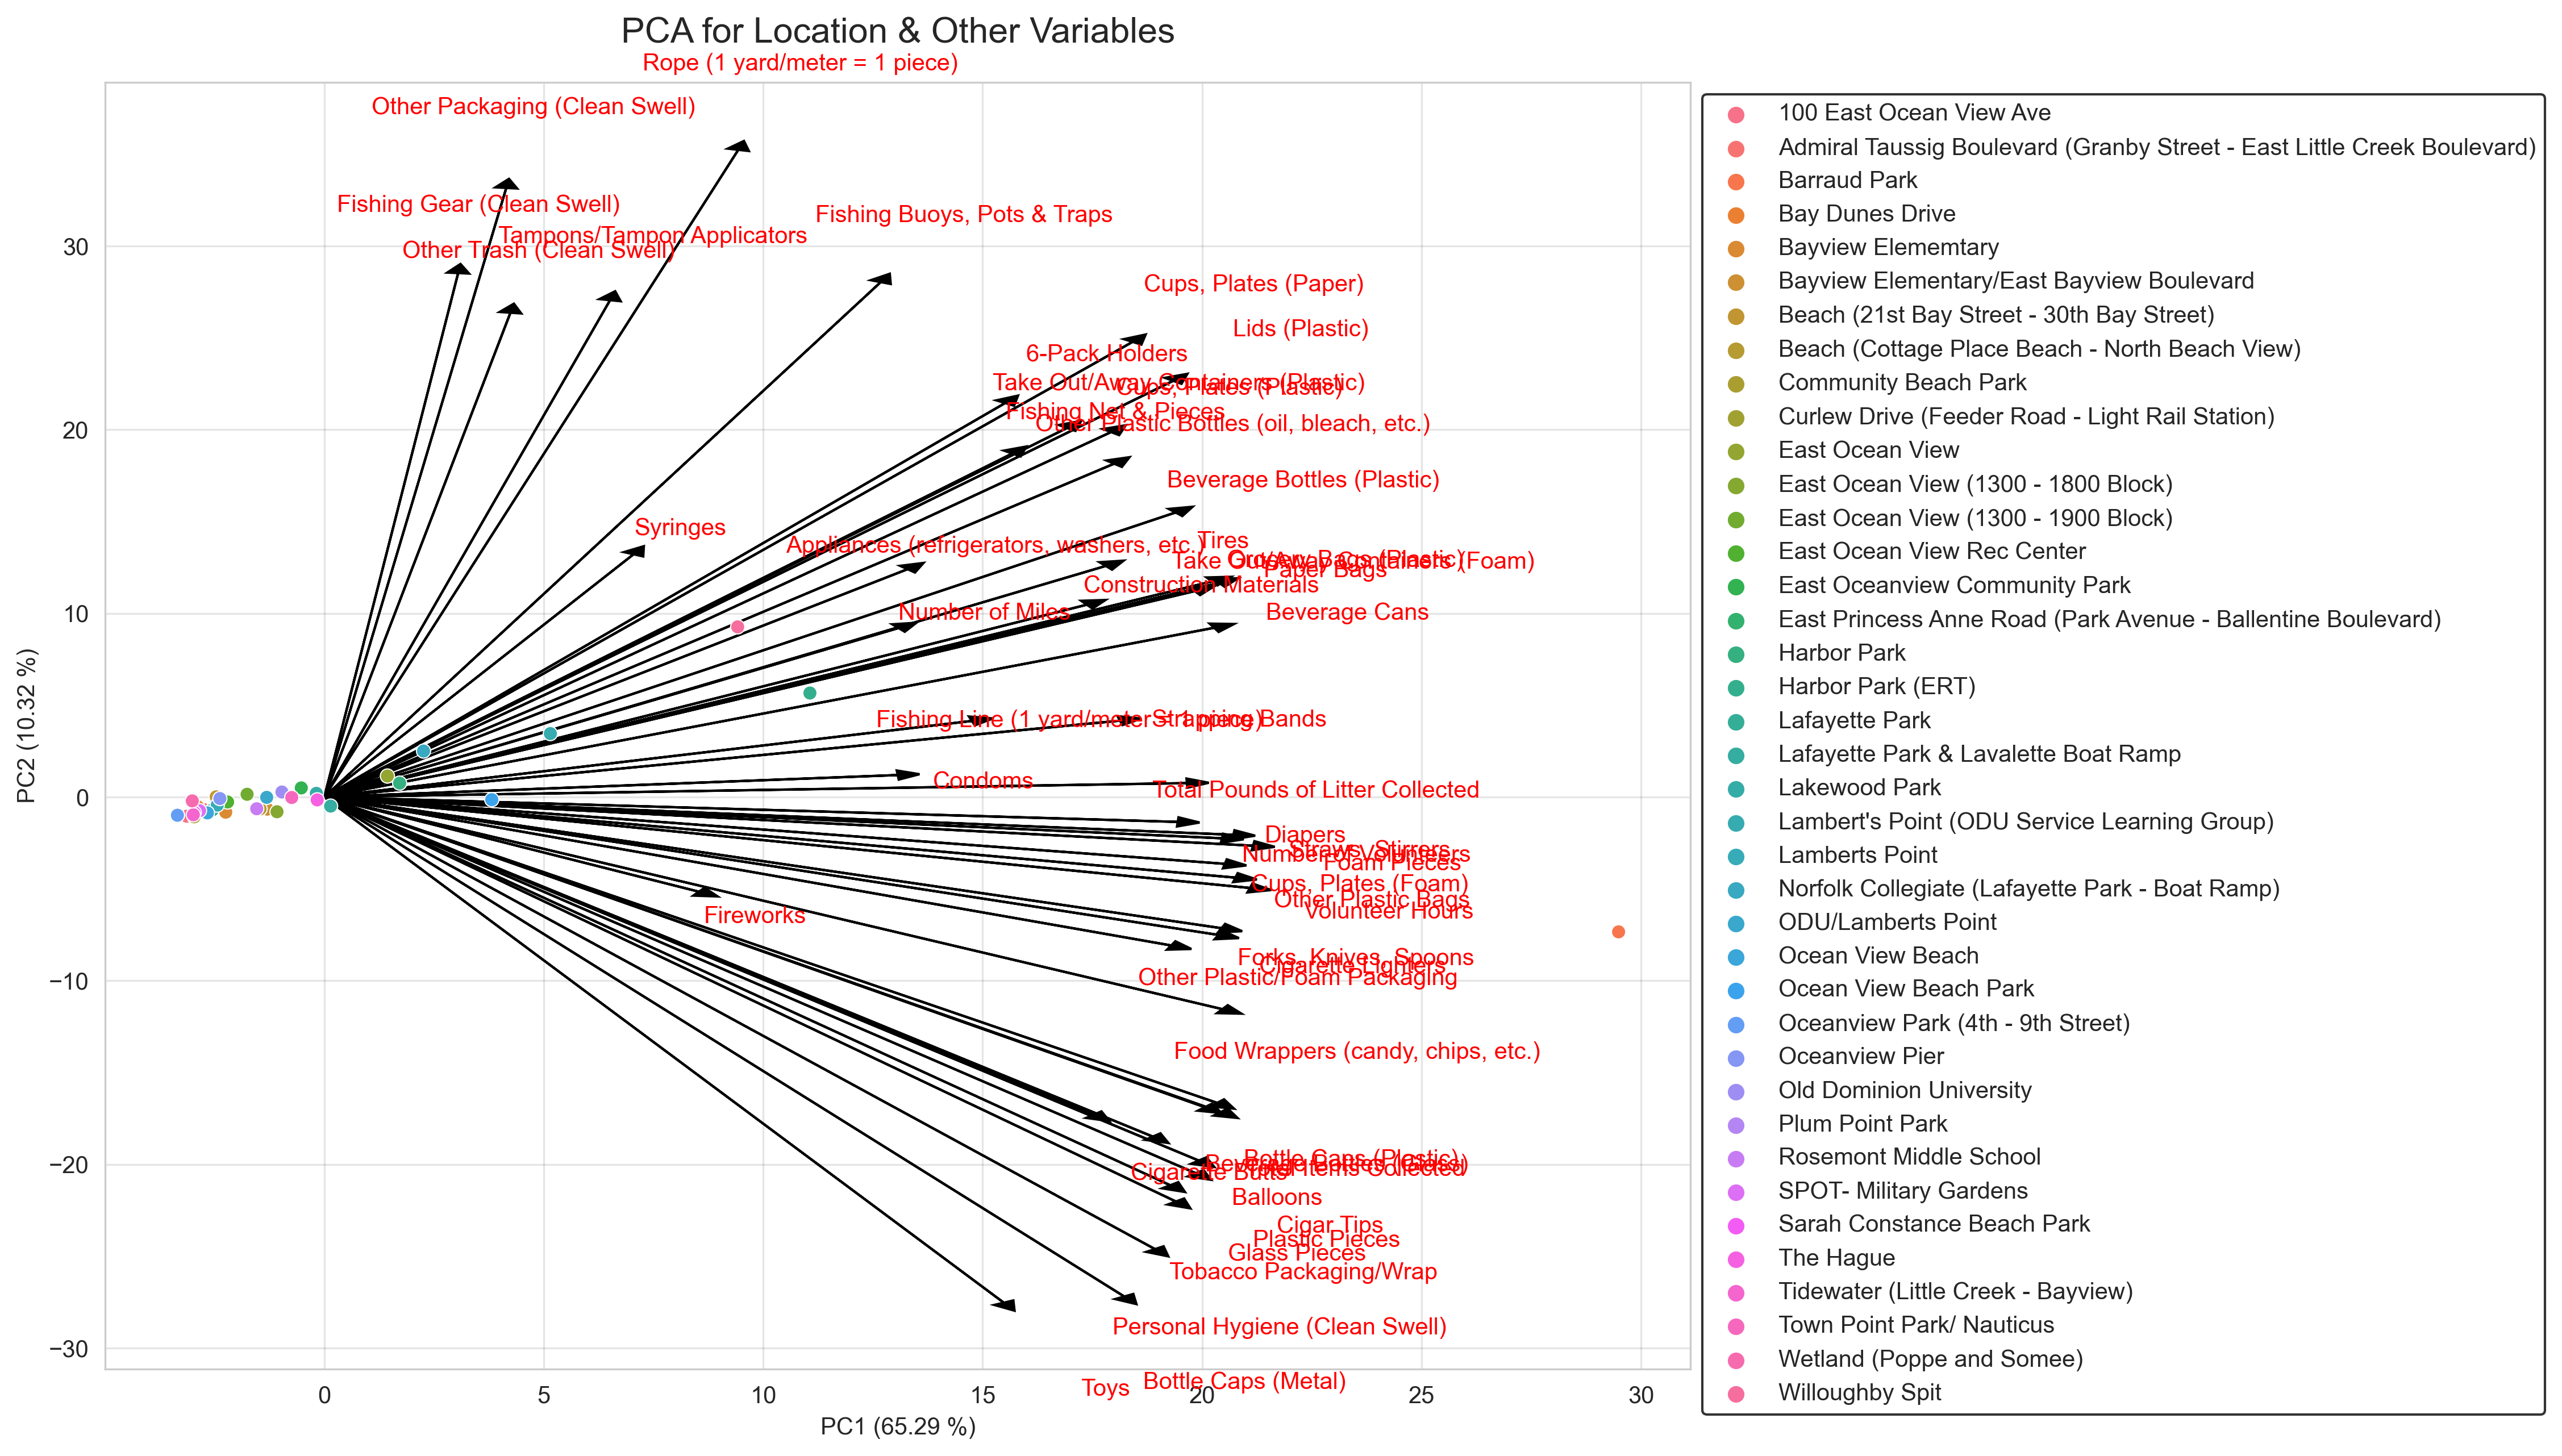

In [197]:
plt.figure(figsize=(12,10),dpi=300)

g = sb.scatterplot(data=pca_data, x="PC1", y="PC2", hue="Area",zorder=2)
plt.title('PCA for Location & Other Variables', x=0.5, y=1.02,size=15)
# Add loadings
loading_plot(loadings[["PC1", "PC2"]].values, loadings.index, scale=125, arrow_size=0.004)

# Add variance explained by the
g.set_xlabel(f"PC1 ({pca_step.explained_variance_ratio_[0]*100:.2f} %)")
g.set_ylabel(f"PC2 ({pca_step.explained_variance_ratio_[1]*100:.2f} %)")
plt.grid(alpha=0.1,color='black',zorder=1)
plt.legend(loc= 'upper left',bbox_to_anchor=(1,1),edgecolor='black')
#ax.set_xlim([-1, x.max() + 1])

#plt.savefig("PCA_plot.png", dpi=600)
plt.show()

#From this figure we can see there's a constant positive correlation with each type of location and the other variables, 
# and that there is no negative correlation
#Barraud Park is the outlier!!

Text(0.5, 1.0, 'Cigarette Butts Collected per Location')

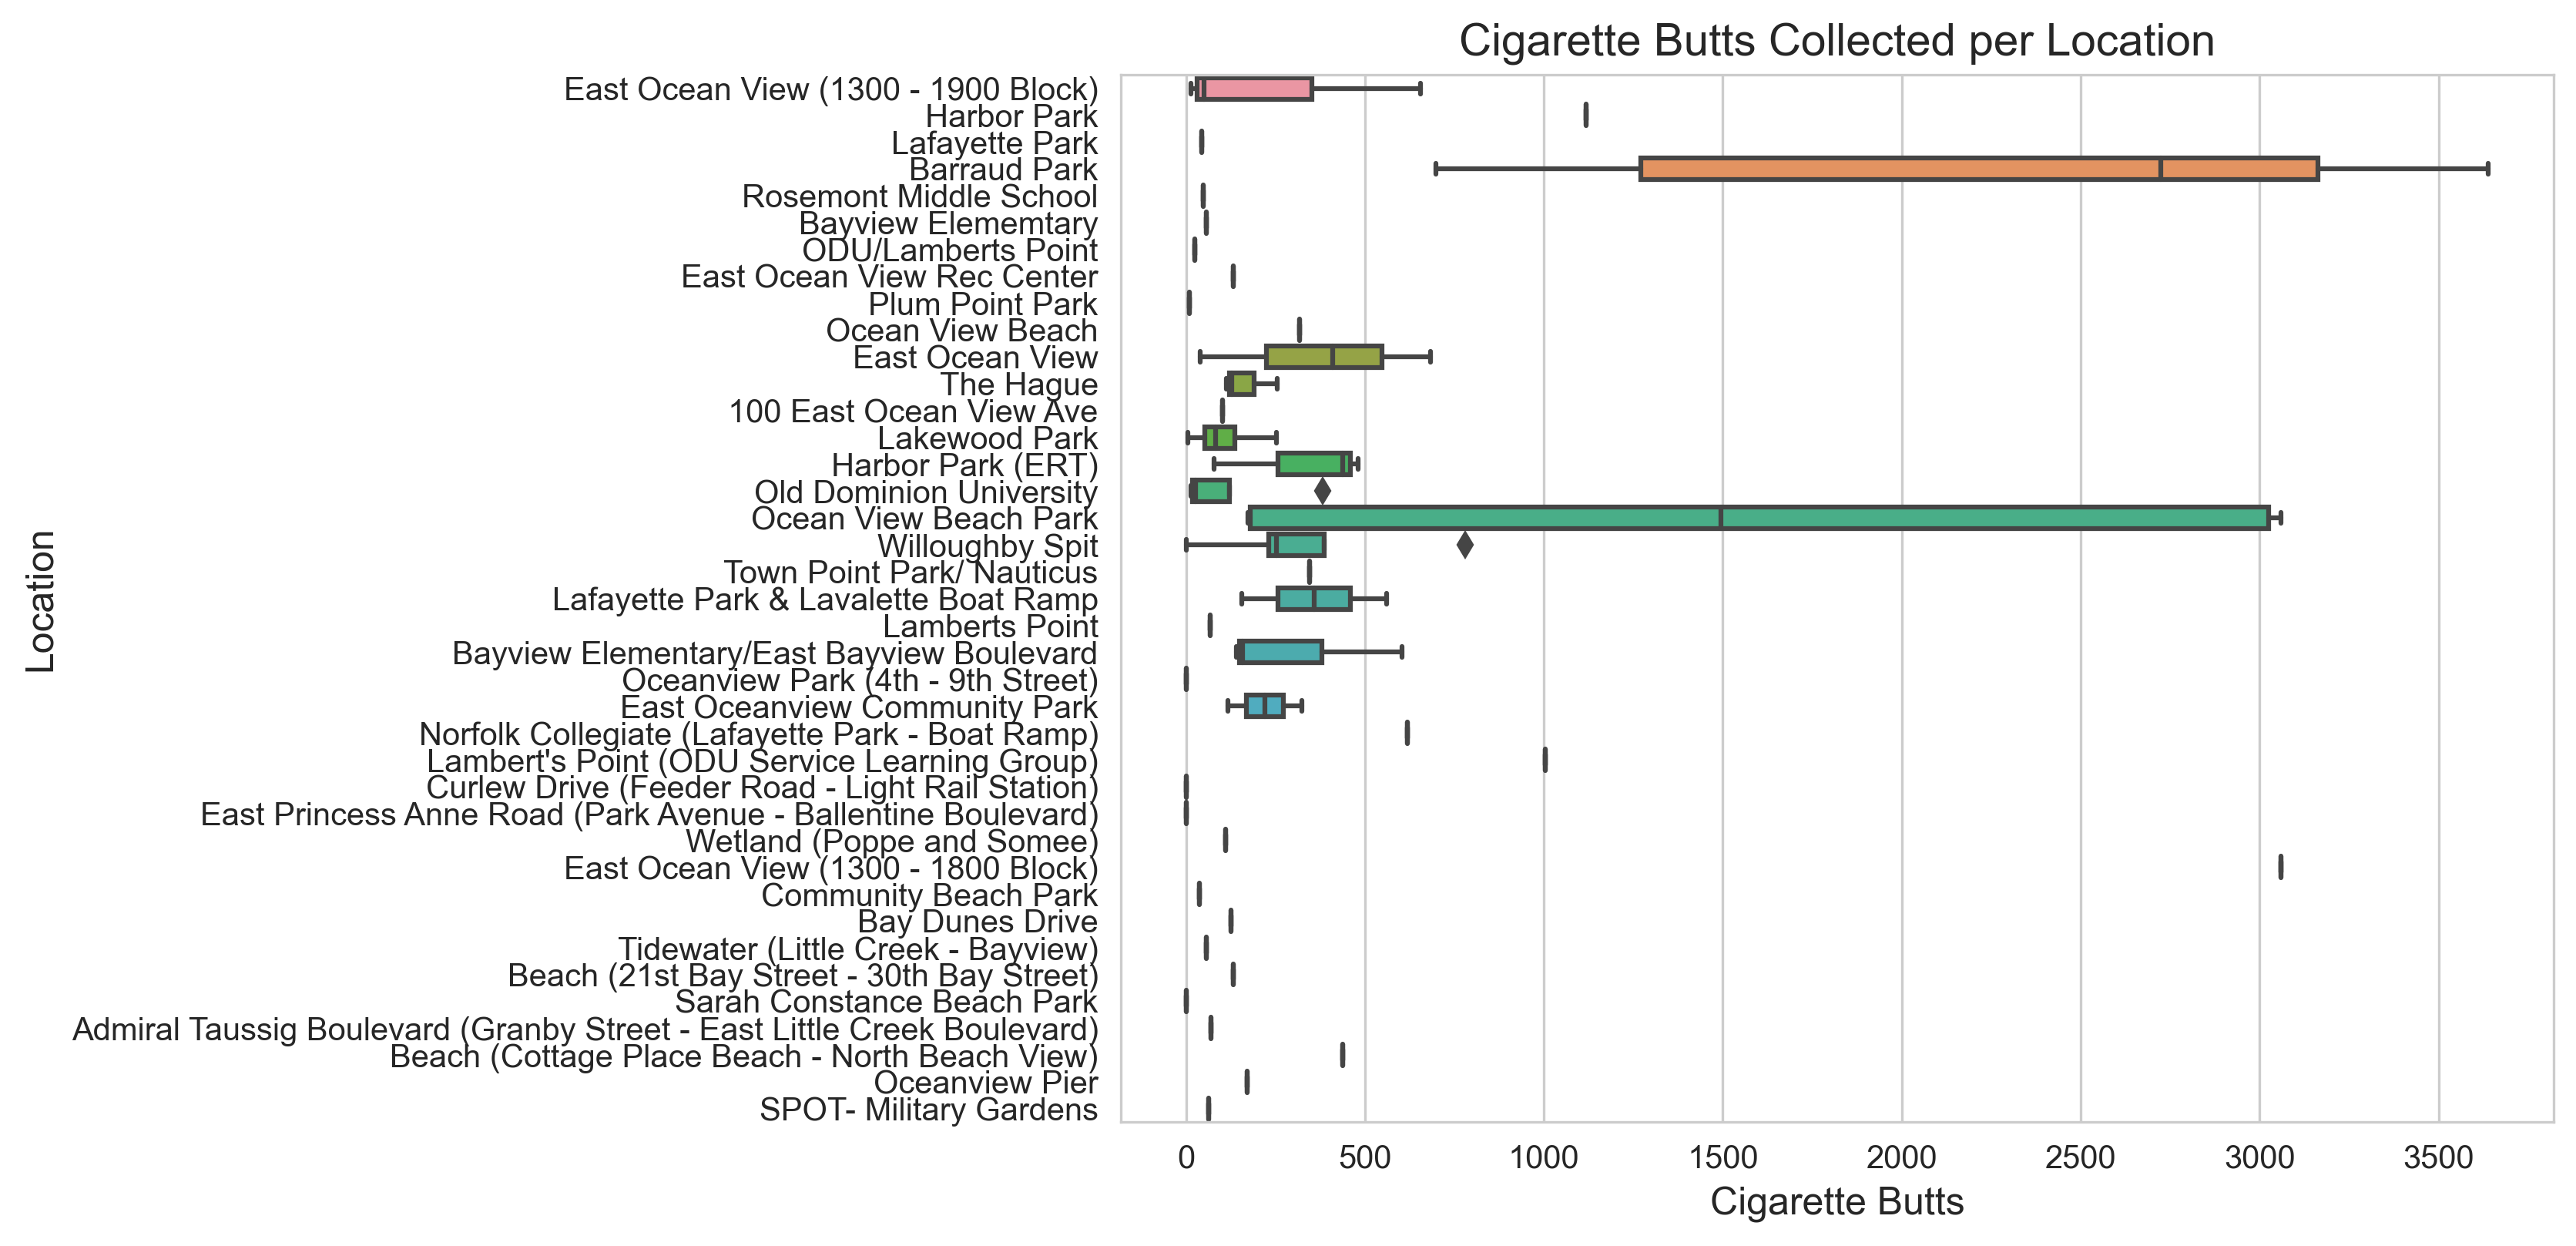

In [198]:
#BOXPLOT for data visualization

fig = plt.figure(figsize = (8,6), dpi = 300)
ax= sb.set_style("whitegrid")
ax = sb.boxplot(x=CigaretteButts,y=Area,data=GroupAreaFinal)
ax.set_xlabel('Cigarette Butts', fontsize = 12)
ax.set_ylabel('Location', fontsize = 12)
plt.title("Cigarette Butts Collected per Location", fontsize=14)

#From this, I notice there is repeat locations because they were taken at different times/years (dates). 
#Could combine by locations for later data analysis (overall instead of yearly differences)

Text(0.5, 1.0, 'Total Items Collected per Location')

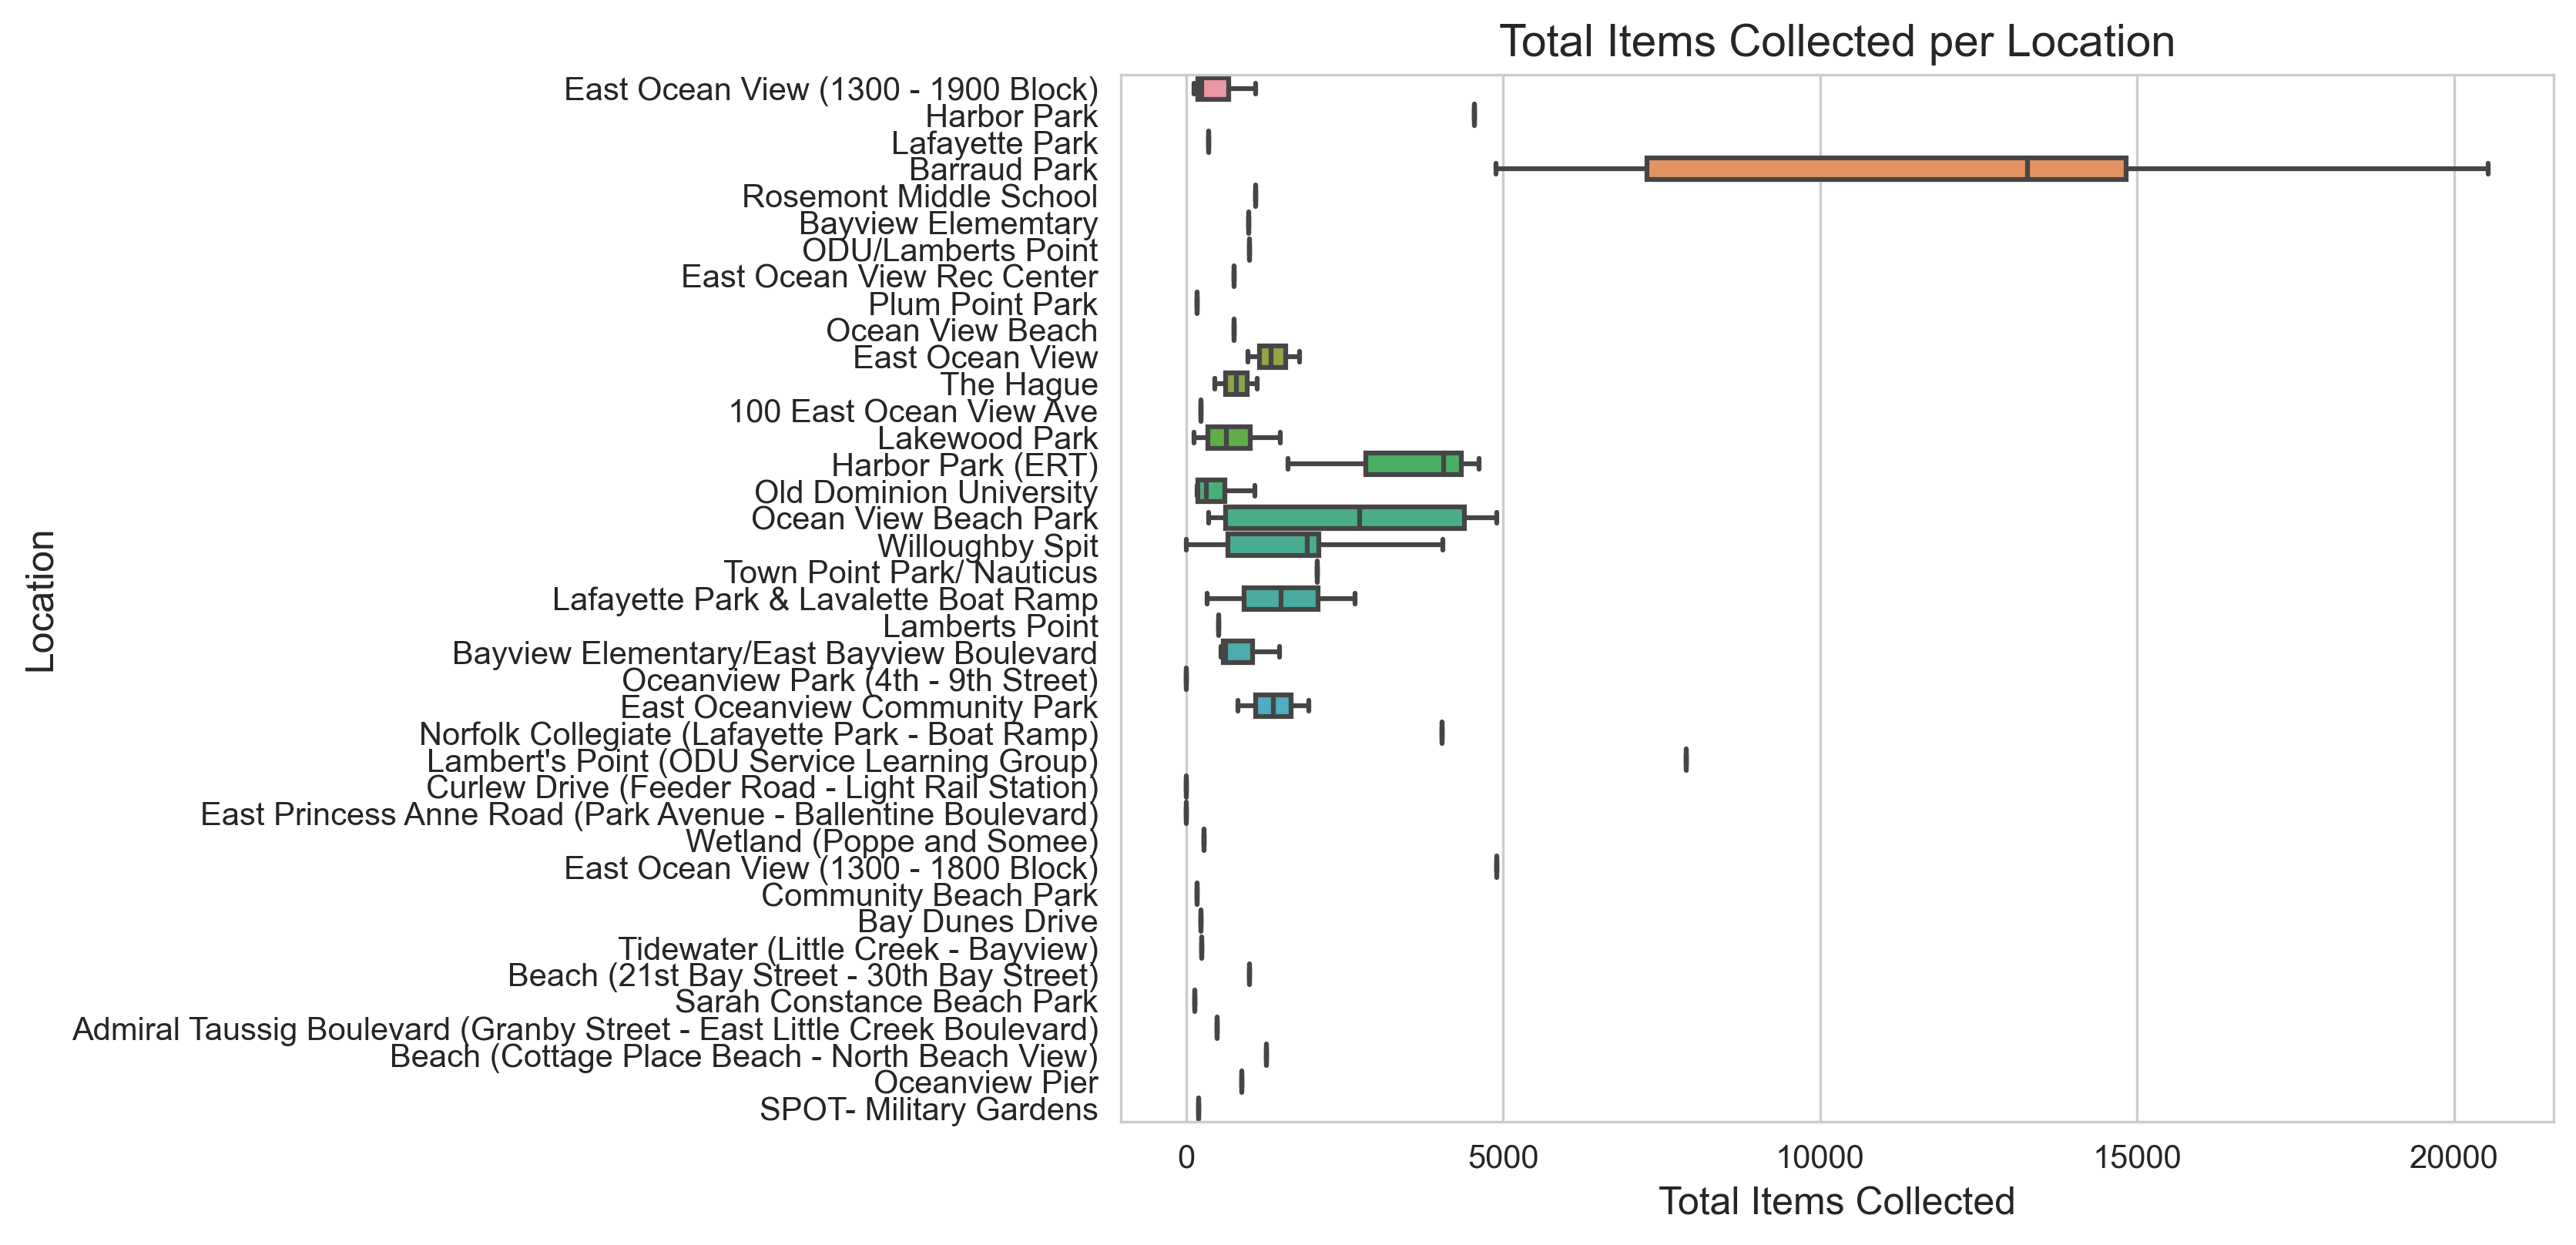

In [199]:
fig = plt.figure(figsize = (8,6), dpi = 300)
ax= sb.set_style("whitegrid")
ax = sb.boxplot(x=TotalItemsCollected,y=Area ,data=GroupAreaFinal)
ax.set_xlabel('Total Items Collected', fontsize = 12)
ax.set_ylabel('Location', fontsize = 12)
plt.title("Total Items Collected per Location", fontsize=14)


Text(0.5, 1.0, 'Total Pounds of Litter Collected per Location')

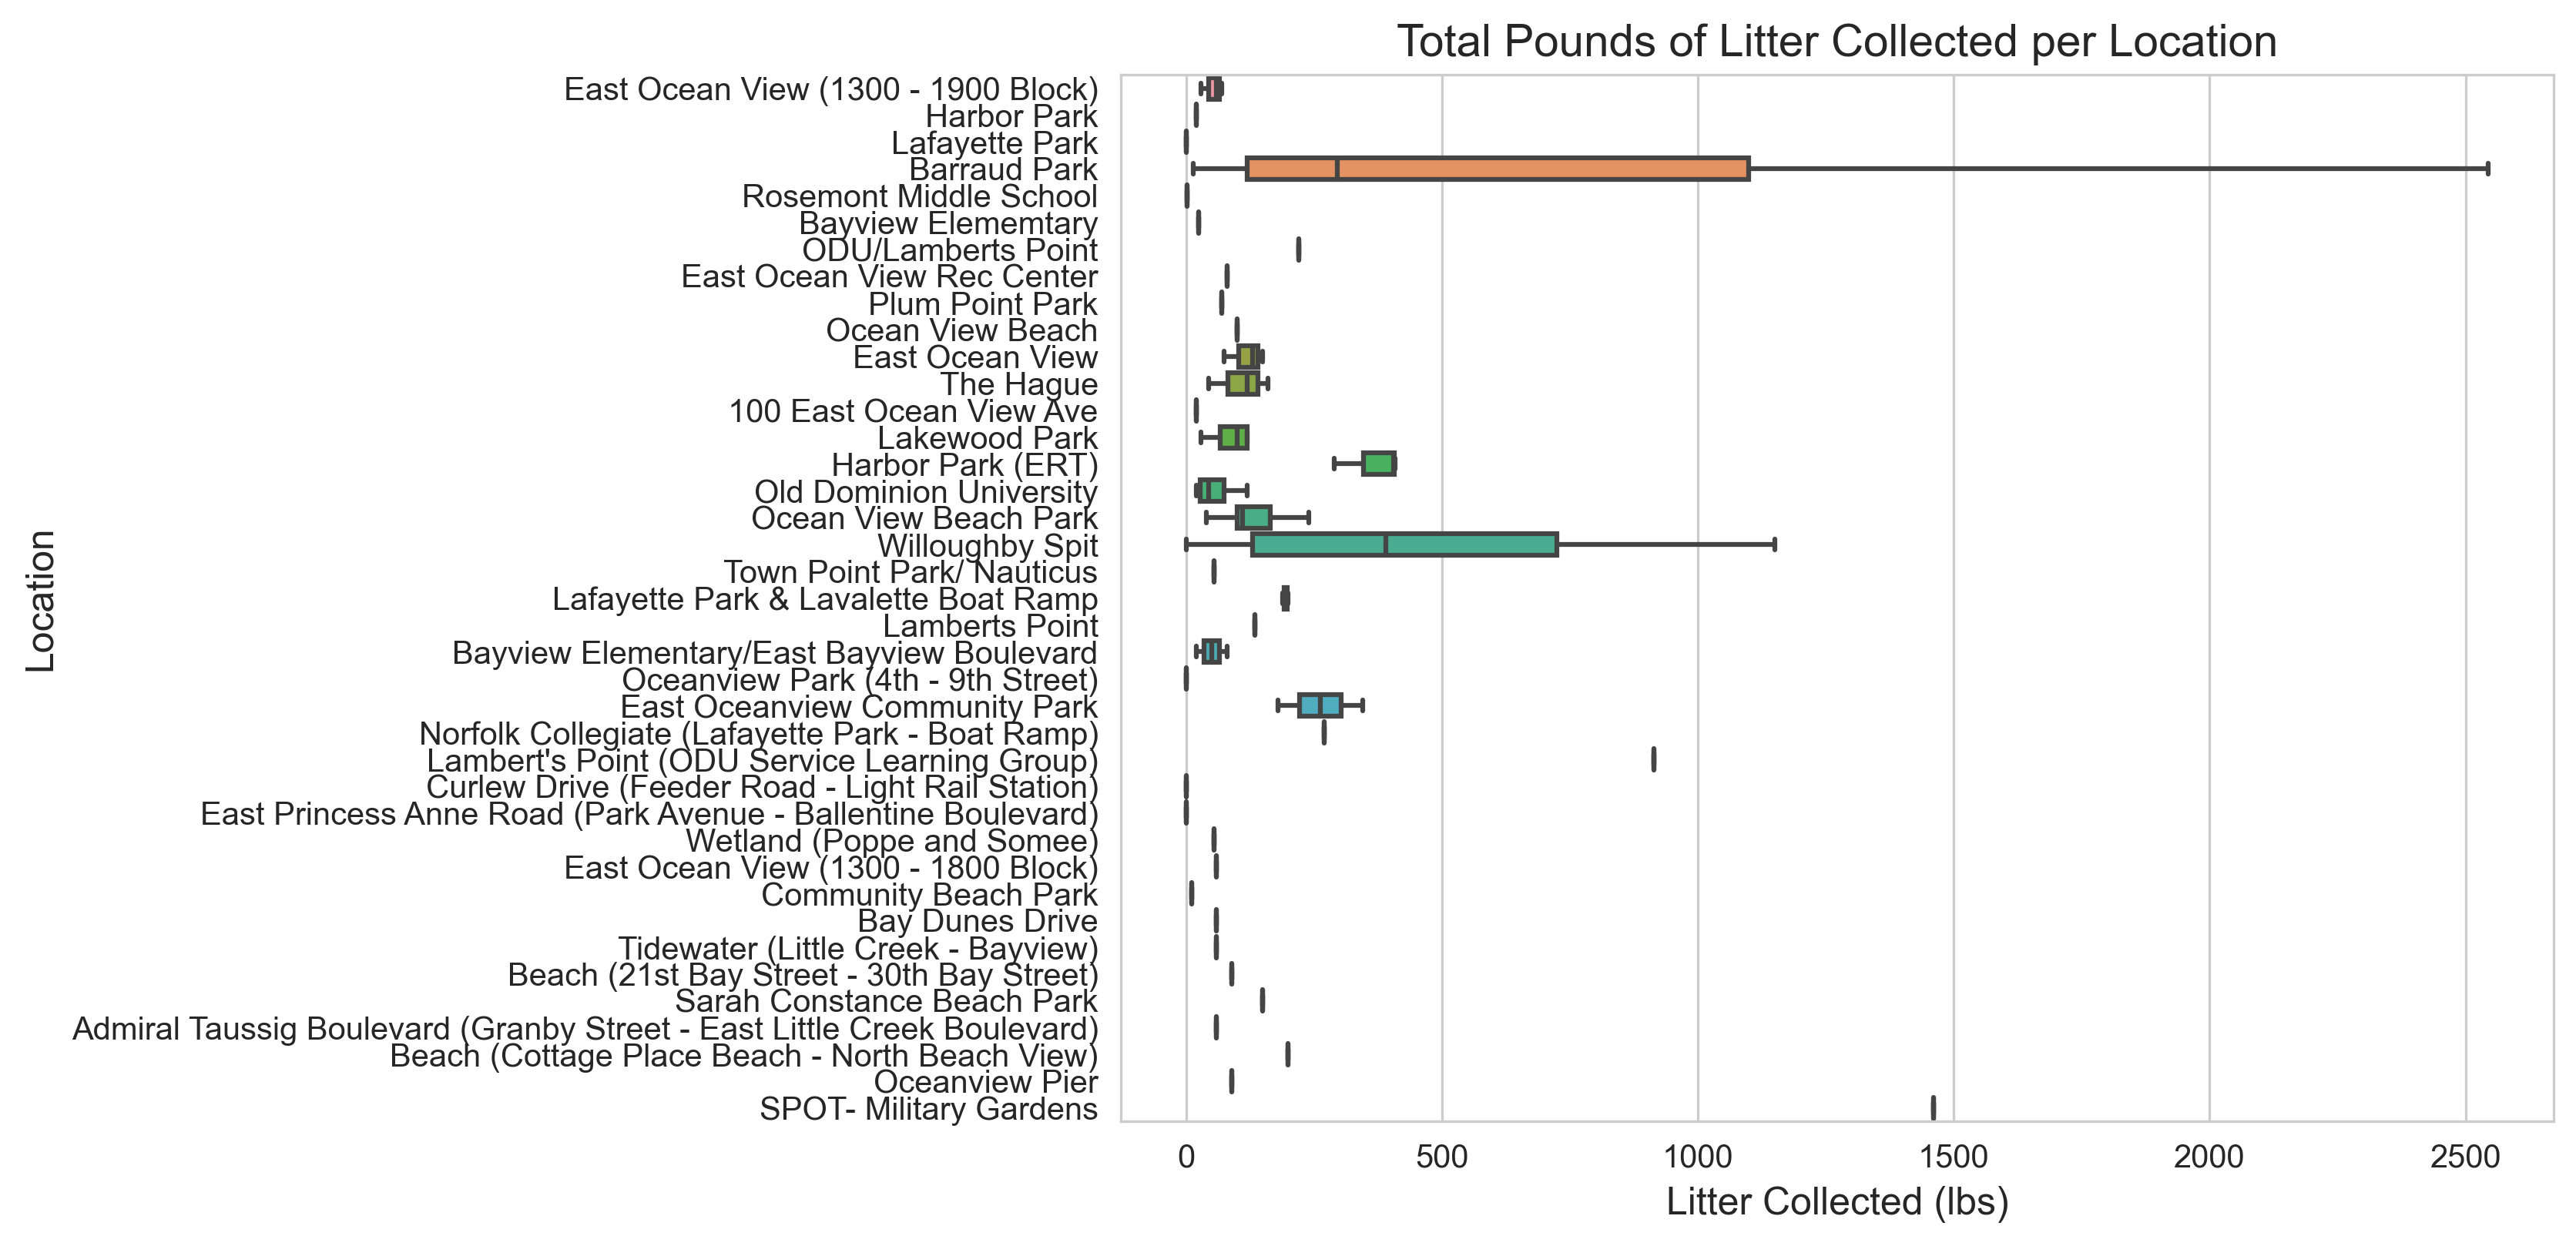

In [200]:
fig = plt.figure(figsize = (8,6), dpi = 300)
ax= sb.set_style("whitegrid")
ax = sb.boxplot(x=TotalPoundsofLitterCollected,y=Area ,data=GroupAreaFinal)
ax.set_xlabel('Litter Collected (lbs)', fontsize = 12)
ax.set_ylabel('Location', fontsize = 12)
plt.title("Total Pounds of Litter Collected per Location", fontsize=14)

Text(0.5, 1.0, 'Total Volunteers per Location')

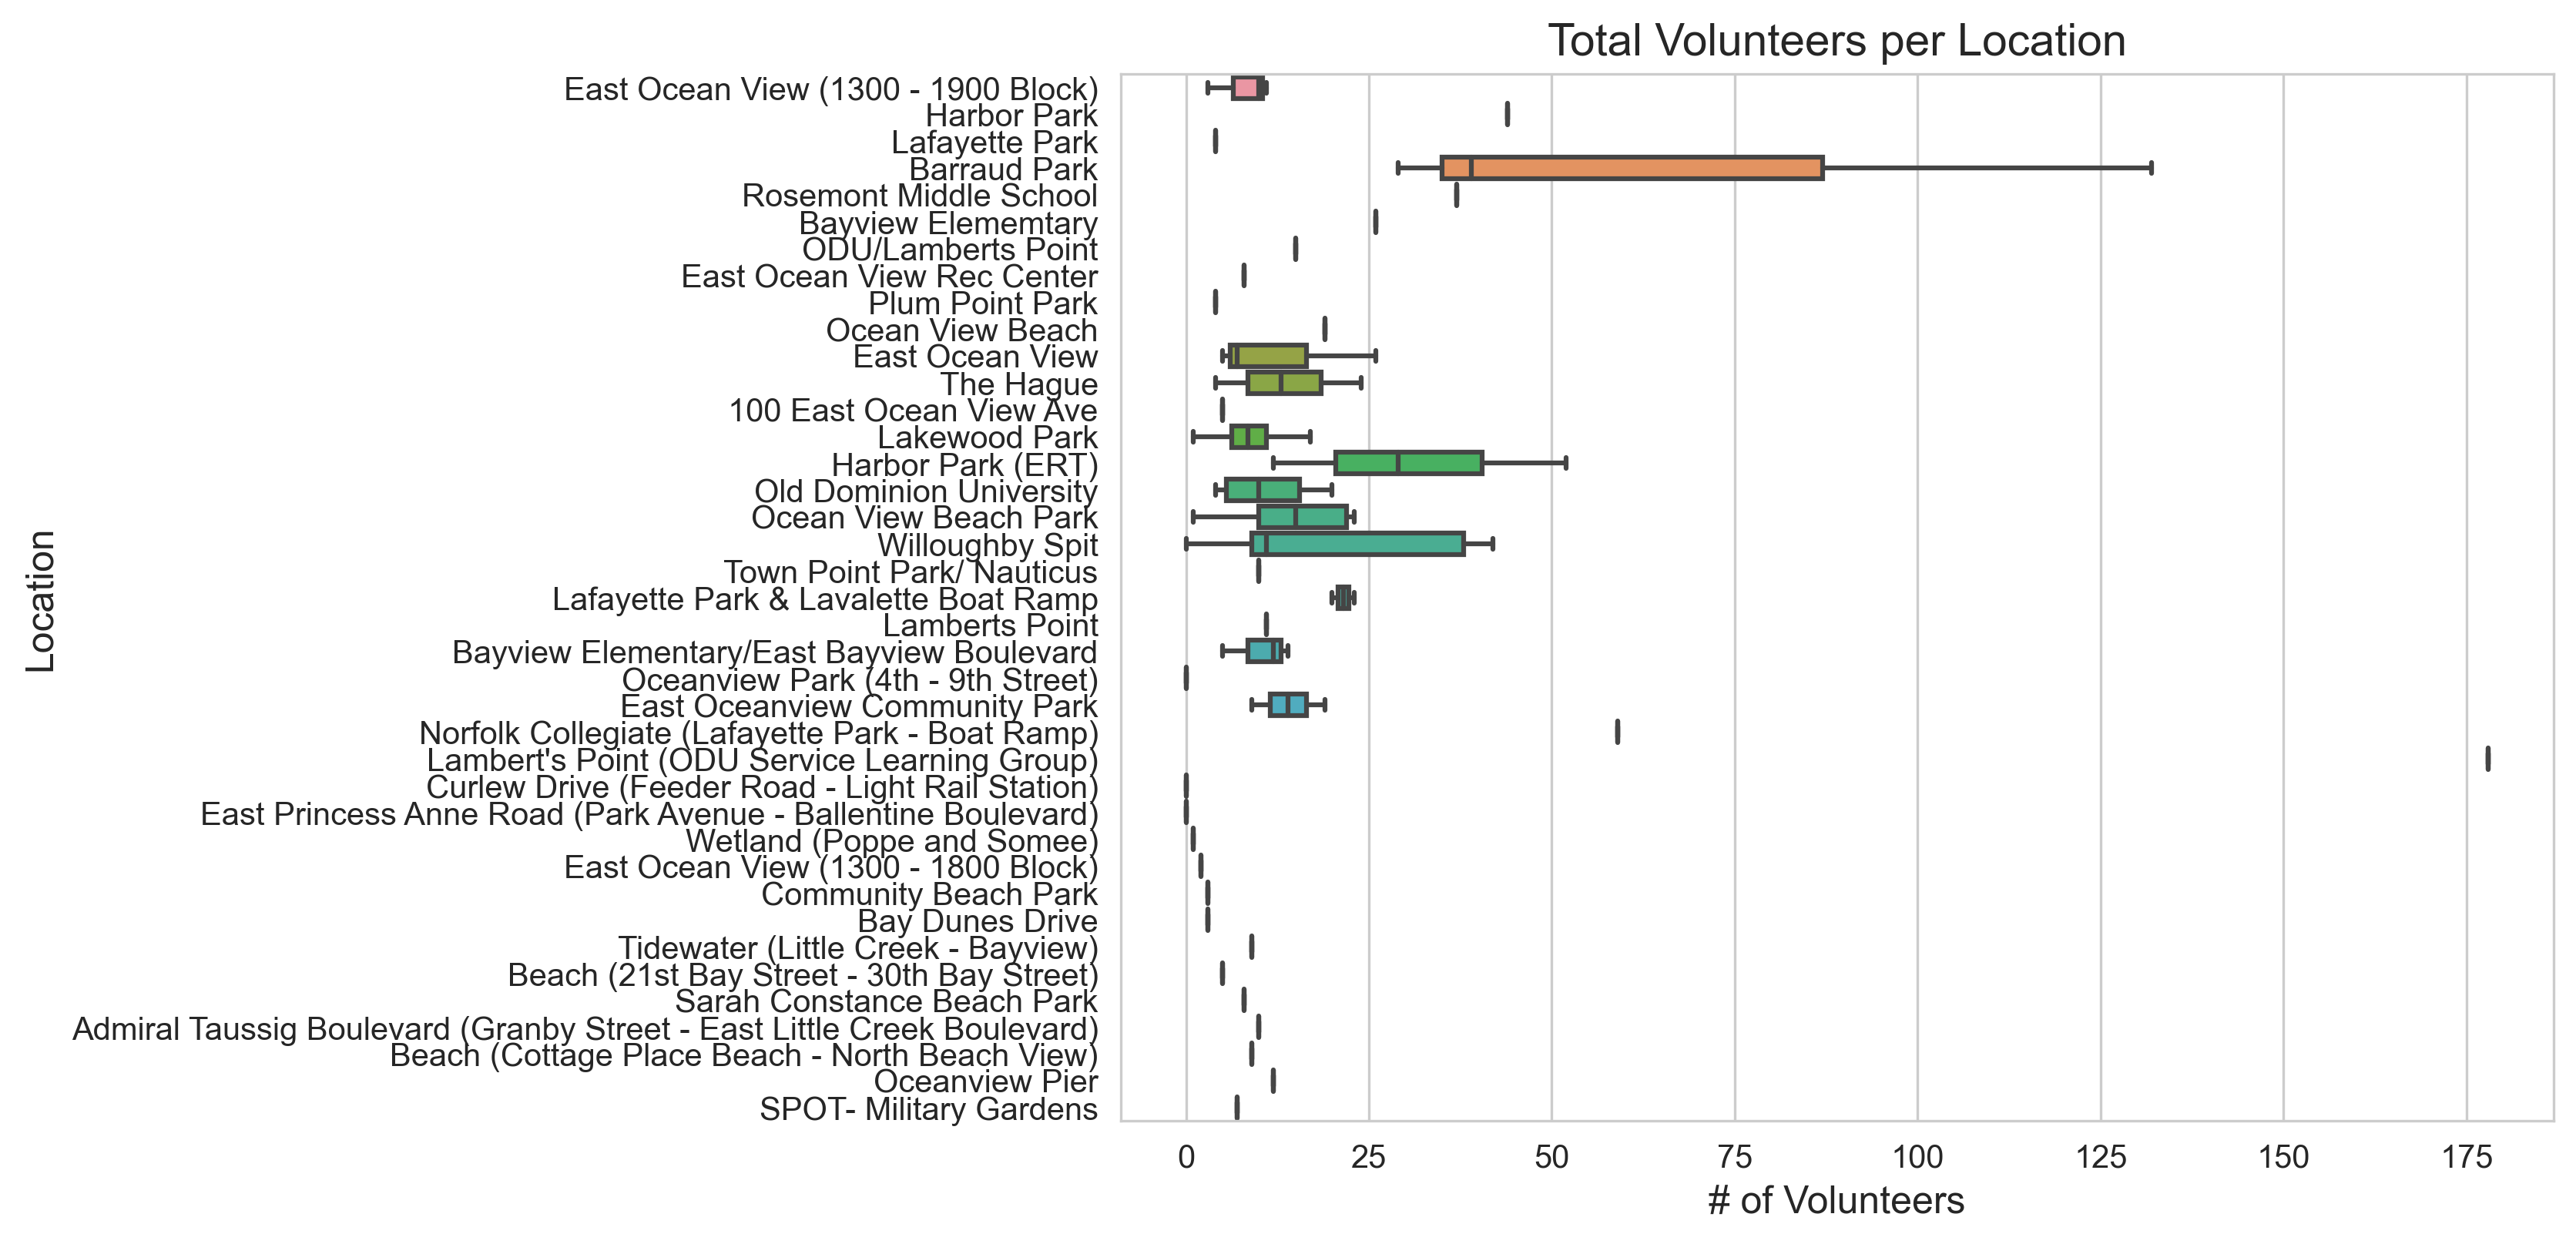

In [201]:
fig = plt.figure(figsize = (8,6), dpi = 300)
ax= sb.set_style("whitegrid")
ax = sb.boxplot(x=VolunteerNumbers,y=Area ,data=GroupAreaFinal)
ax.set_xlabel('# of Volunteers', fontsize = 12)
ax.set_ylabel('Location', fontsize = 12)
plt.title("Total Volunteers per Location", fontsize=14)

Text(0.5, 1.0, 'Total Volunteer Hours per Location')

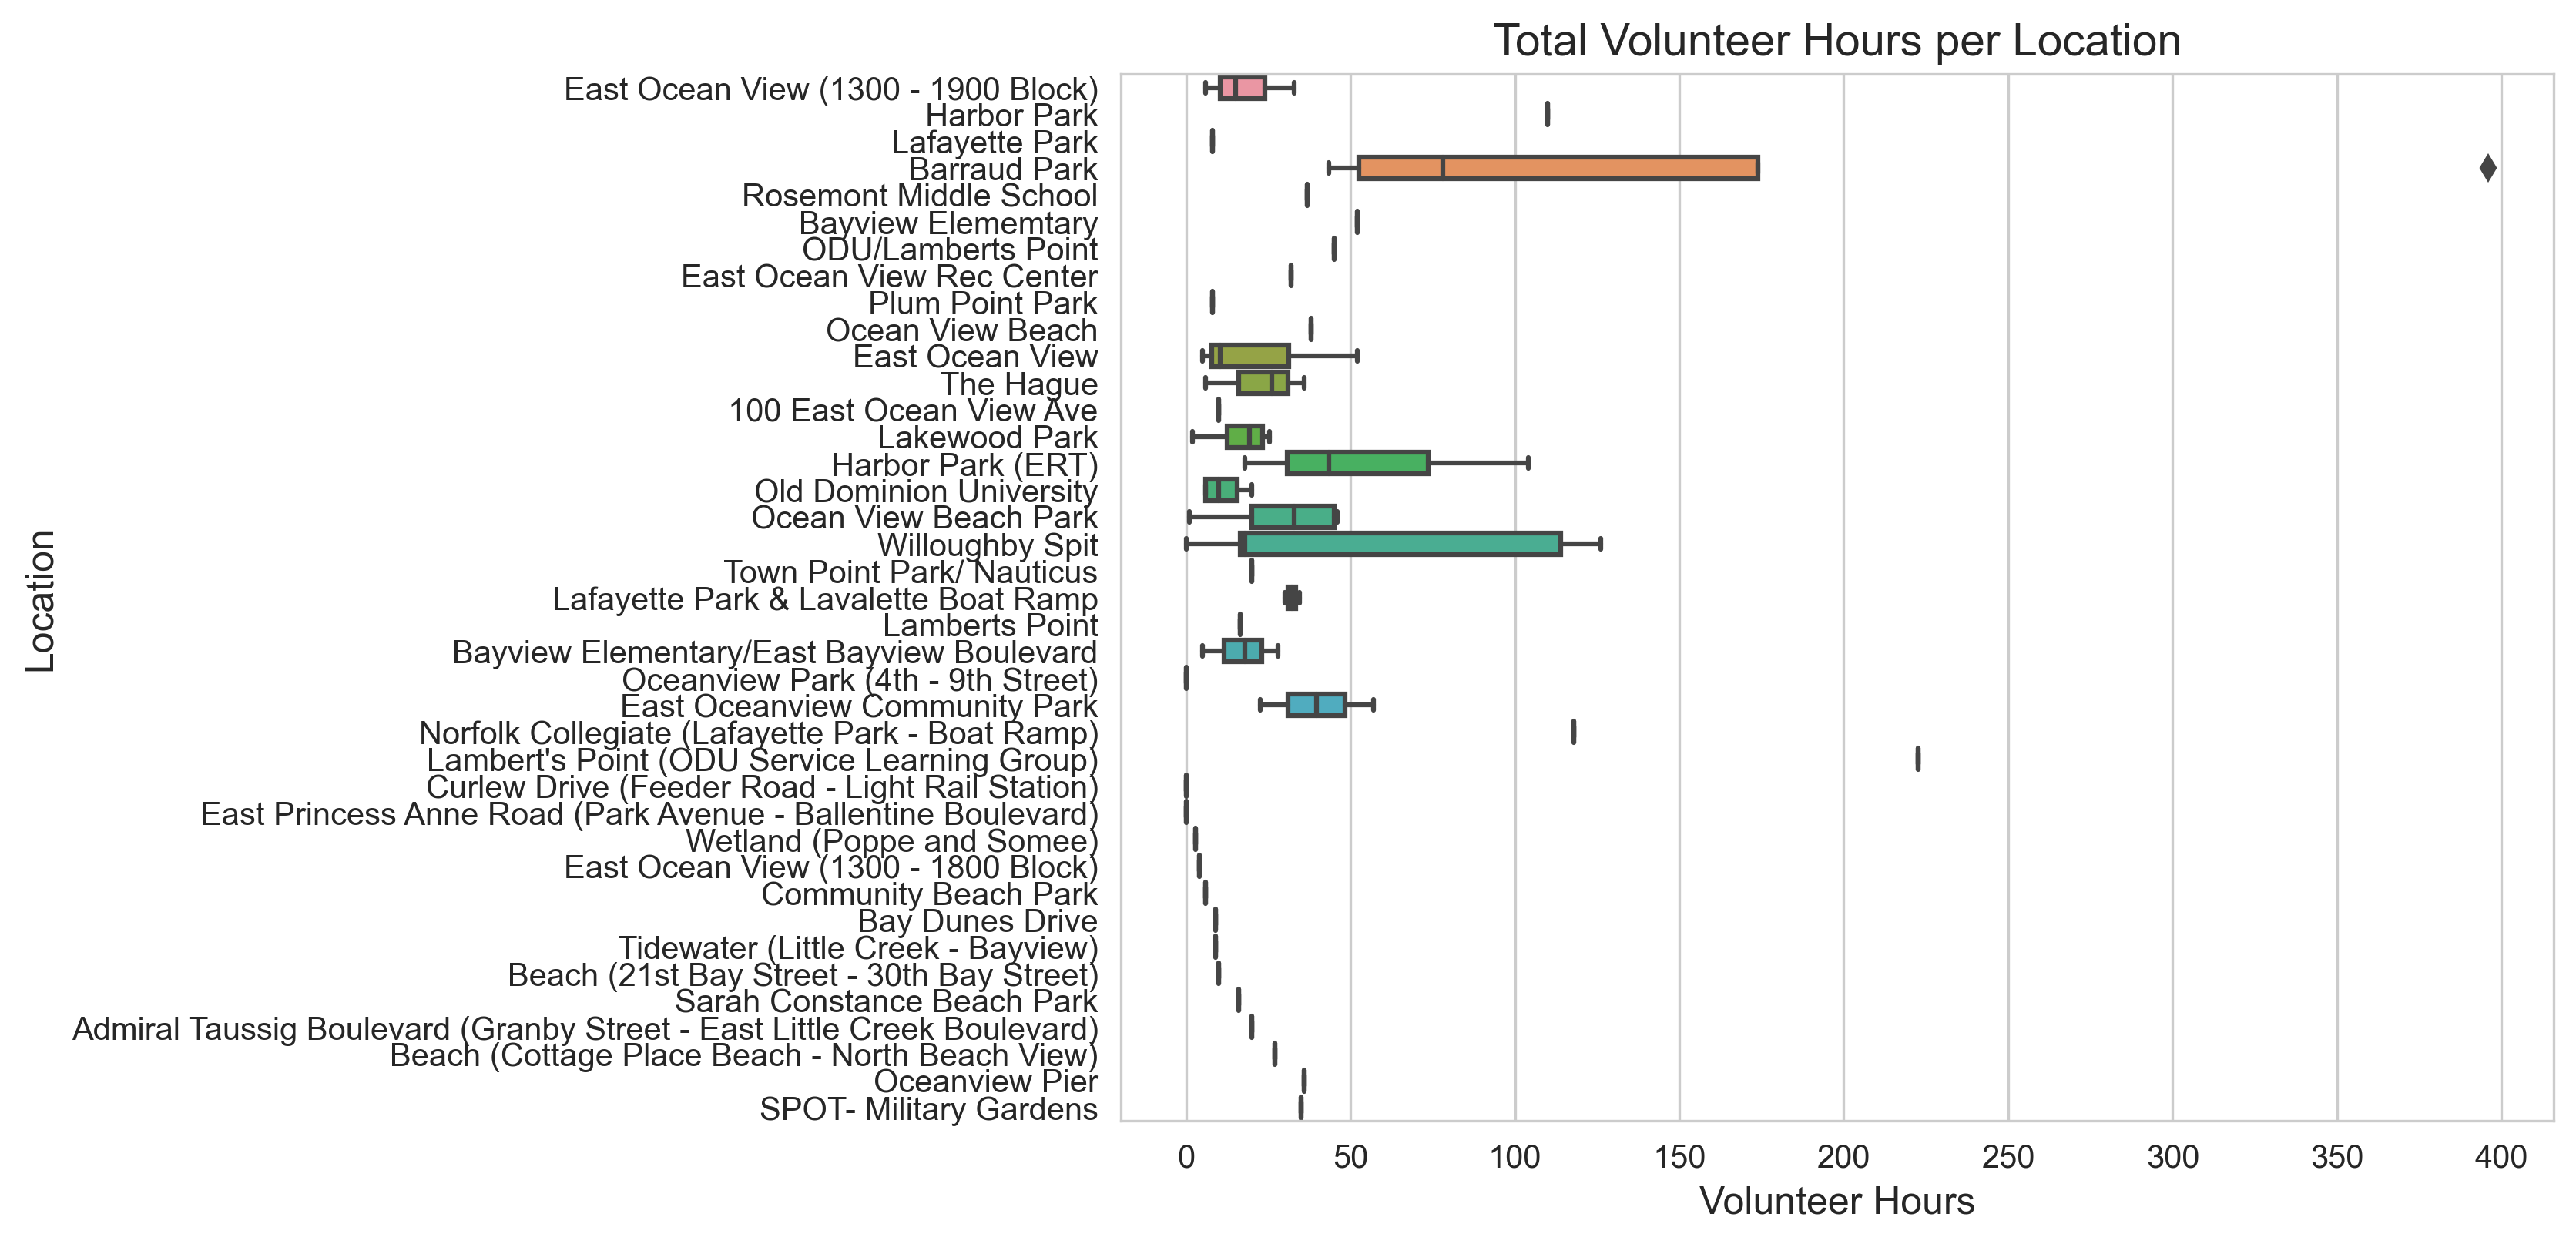

In [202]:
fig = plt.figure(figsize = (8,6), dpi = 300)
ax= sb.set_style("whitegrid")
ax = sb.boxplot(x=VolunteerHours,y=Area ,data=GroupAreaFinal)
ax.set_xlabel('Volunteer Hours', fontsize = 12)
ax.set_ylabel('Location', fontsize = 12)
plt.title("Total Volunteer Hours per Location", fontsize=14)

Text(0.5, 1.0, 'Total Miles Covered per Location')

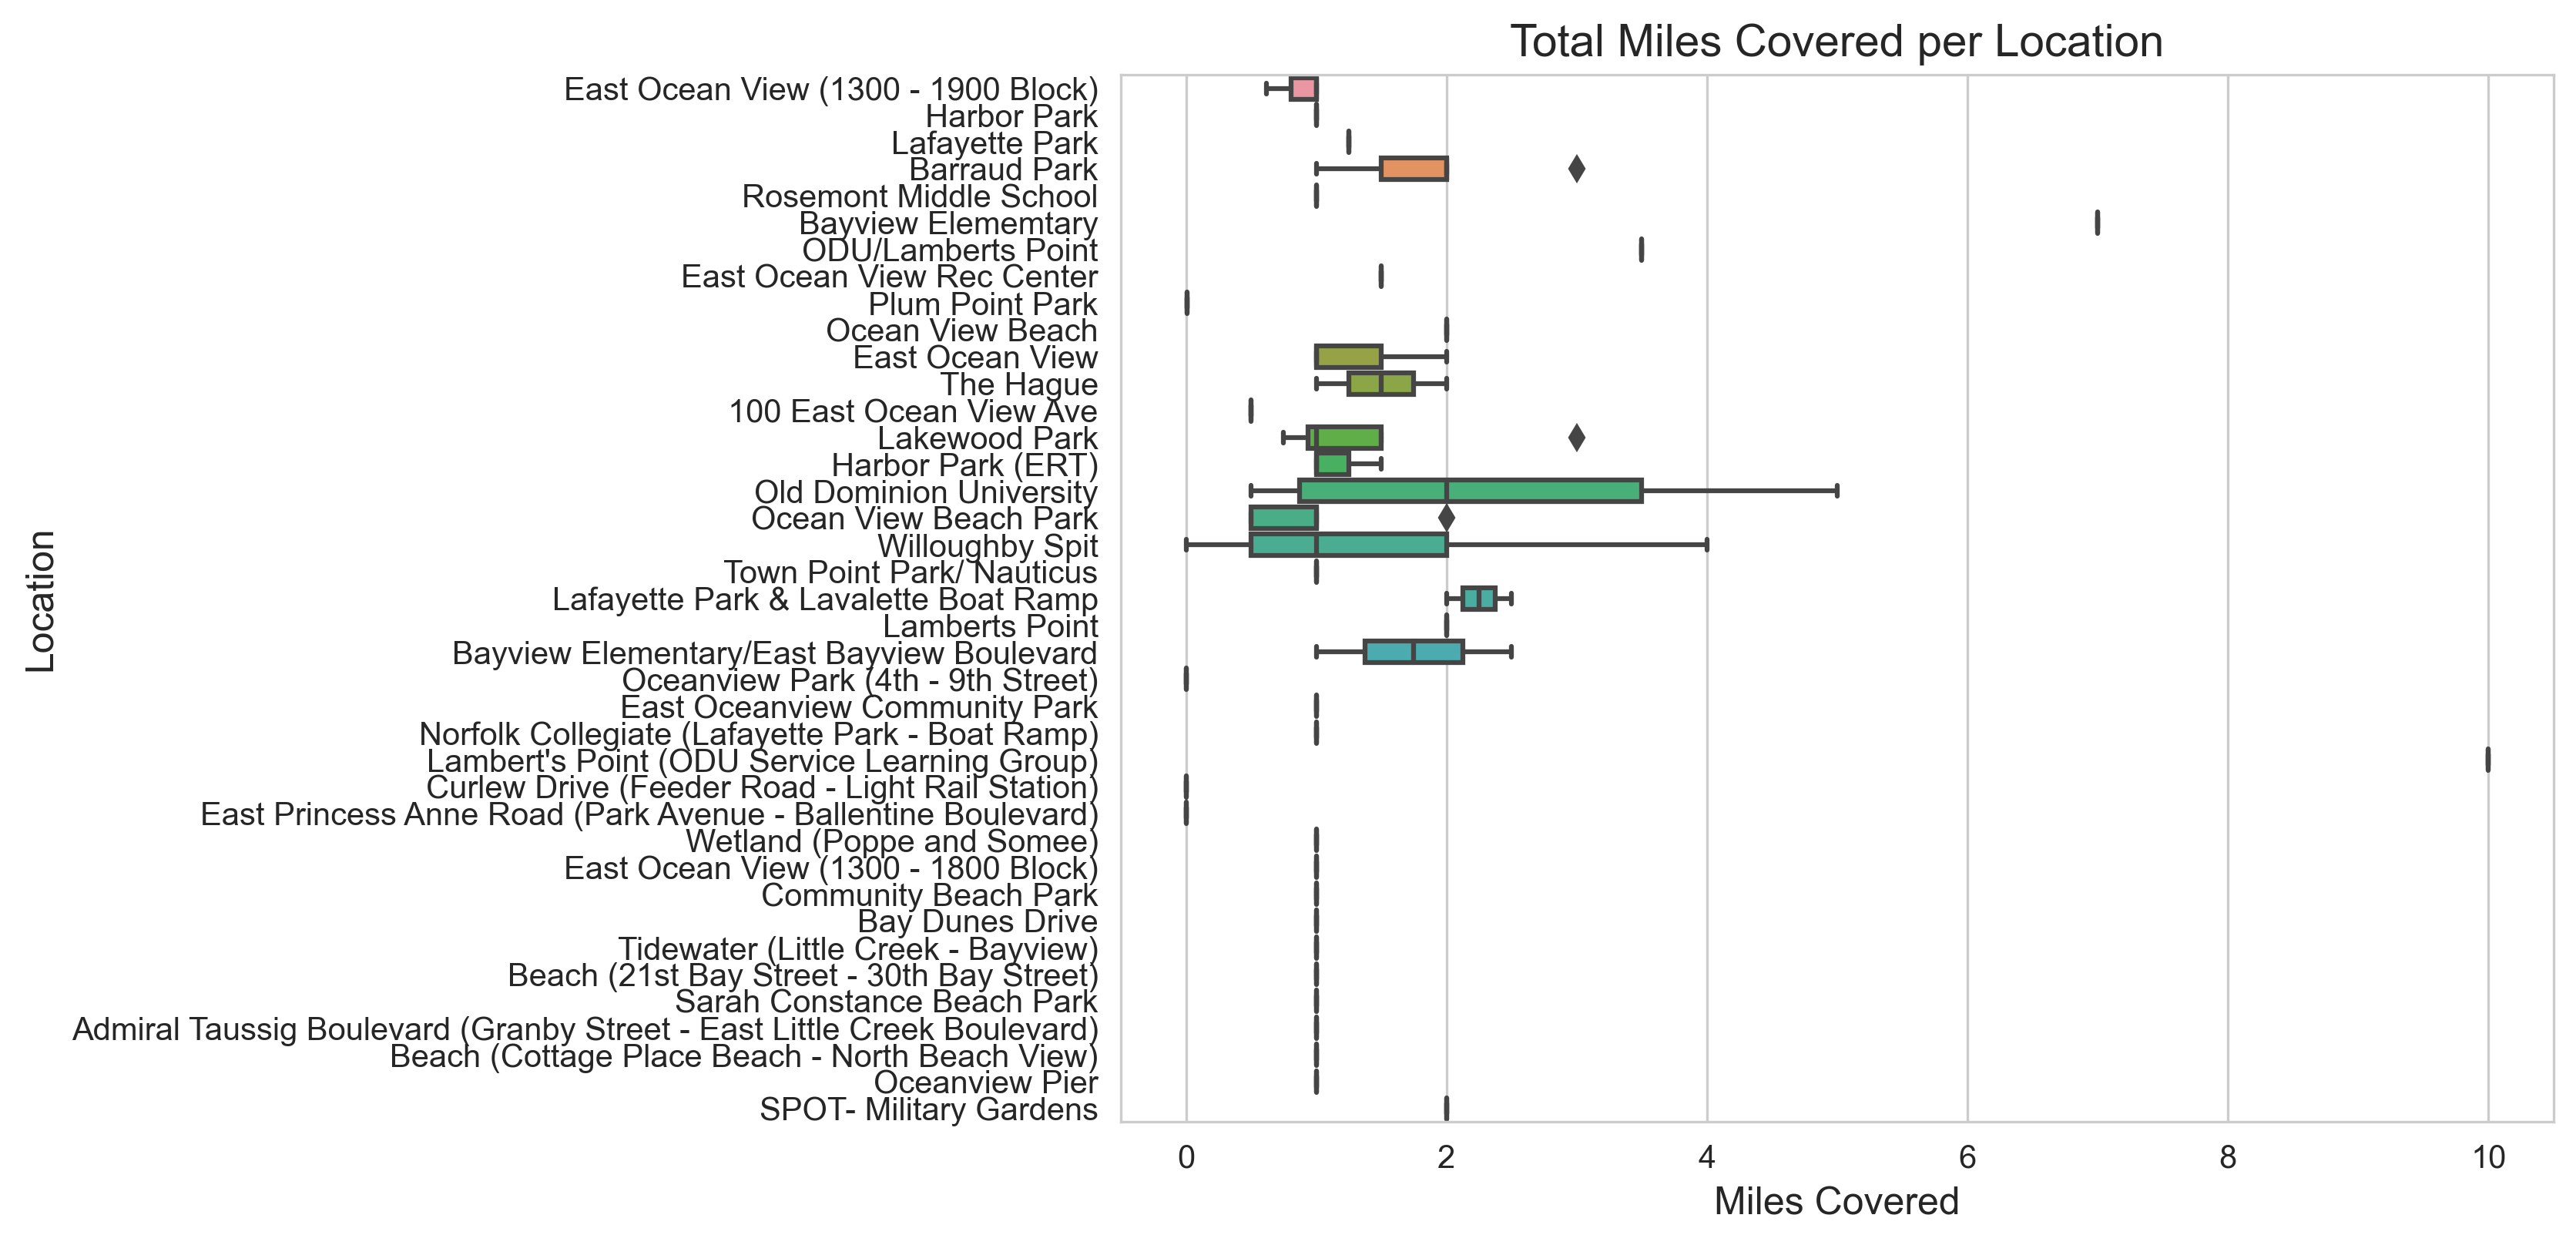

In [203]:
fig = plt.figure(figsize = (8,6), dpi = 300)
ax= sb.set_style("whitegrid")
ax = sb.boxplot(x=NumberofMiles,y=Area ,data=GroupAreaFinal)
ax.set_xlabel('Miles Covered', fontsize = 12)
ax.set_ylabel('Location', fontsize = 12)
plt.title("Total Miles Covered per Location", fontsize=14)


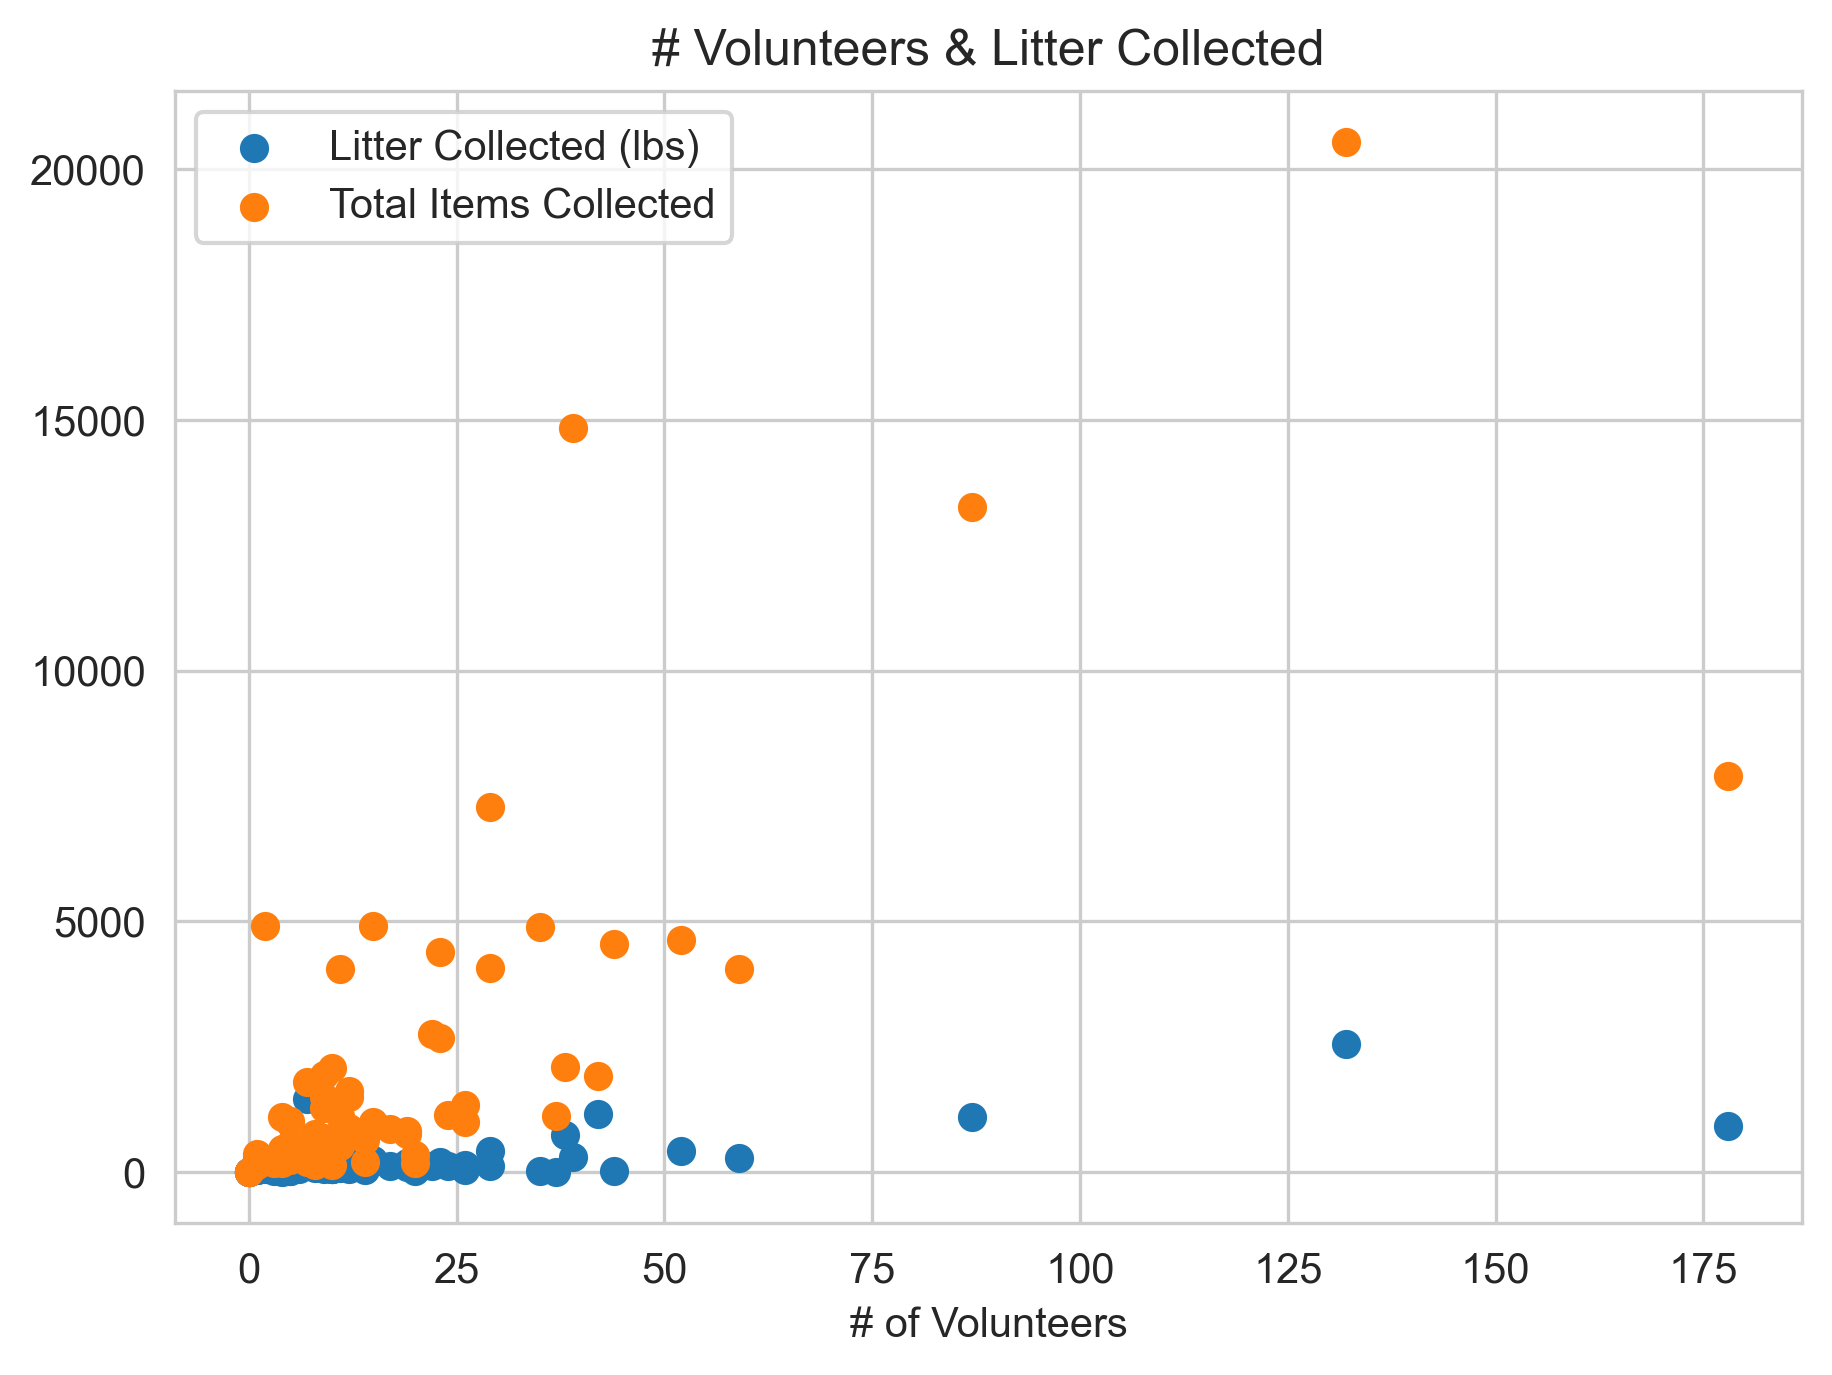

In [204]:
#Outlier analysis

#From the boxplots above:
#There is outliers in the data, especially in Barraud park in terms of trash (pounds & items) and volunteers (# and hours), in 2022.
#Norfolk Collegiate (Lafayette Park-Boat Ramp) had the most miles covered (10 miles)
#Willoughby Spit also had a lot of lbs of litter collected. 
#Lambert's Point (ODU Service Learning Group) Had an outlier amount of volunteers (Greater than 175)
#Could be a correlation between # of volunteers and hours with amount of trash collected?
#furthermore with each type of trash

#Need to do correlation analysis with all variables
#Data is probably nonparametric- need to test to make sure
#normal distribution or nah? could test for residuals/visualize data

fig = plt.figure(figsize = (7,5), dpi = 300)
plt.scatter(VolunteerNumbers, TotalPoundsofLitterCollected,label=str('Litter Collected (lbs)'))
plt.scatter(VolunteerNumbers, TotalItemsCollected,label=str('Total Items Collected'))
plt.title('# Volunteers & Litter Collected')
plt.legend(loc='upper left')
plt.xlabel('# of Volunteers')
plt.show()

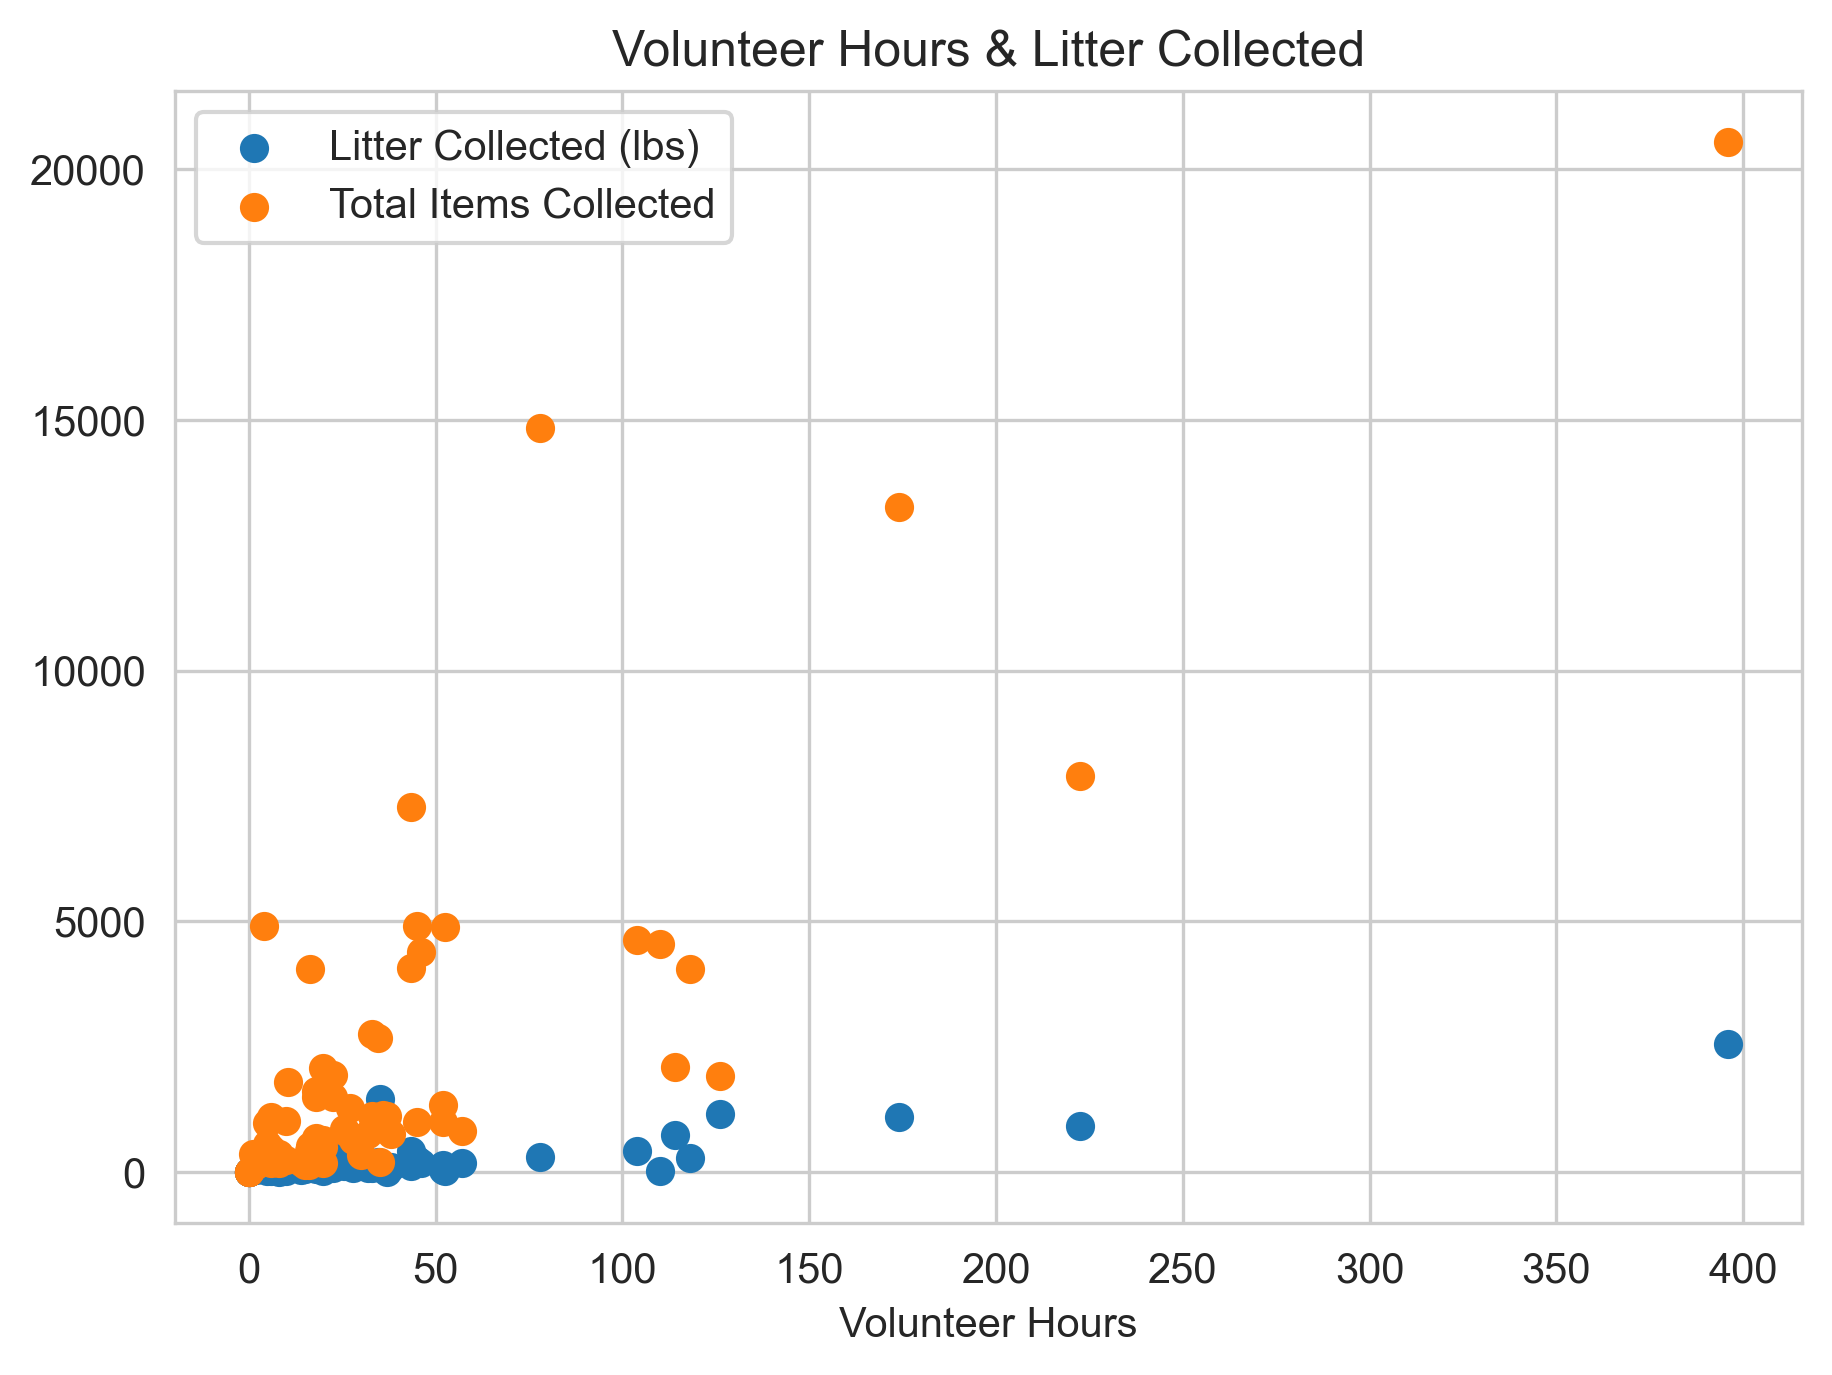

In [205]:
fig = plt.figure(figsize = (7,5), dpi = 300)
plt.scatter(VolunteerHours, TotalPoundsofLitterCollected,label=str('Litter Collected (lbs)'))
plt.scatter(VolunteerHours, TotalItemsCollected,label=str('Total Items Collected'))
plt.title('Volunteer Hours & Litter Collected')
plt.legend(loc='upper left')
plt.xlabel('Volunteer Hours')
plt.show()

# General trend- as # of volunteers and hours increase, the weight and amount of litter seems to increase as well.
#Need to do more stats to be sure

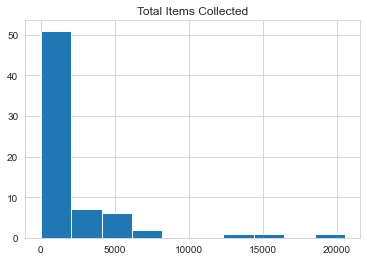

In [206]:
#Determining if data is nonparametric vs parametric - 1st step before doing statistical analysis
#The code I adapted from this website:
# https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

#Normal/Gaussian distribution = parametric tests
#Not a Gaussian distribution = nonparametric test

#If multiple data are not normally distributed, it's best to use non-parametric tests for all variables 
#First, visually with histogram (bell curve)

plt.hist(TotalItemsCollected)
plt.title('Total Items Collected')
plt.show()

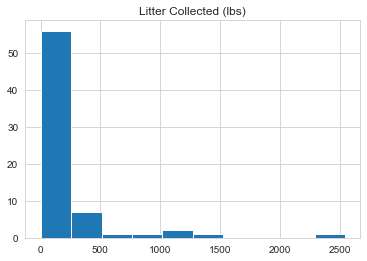

In [207]:
plt.hist(TotalPoundsofLitterCollected)
plt.title('Litter Collected (lbs)')
plt.show()

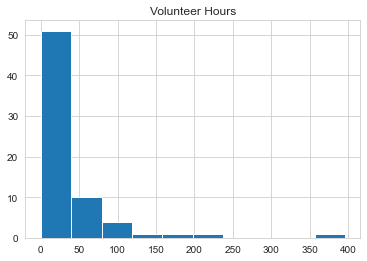

In [208]:
plt.hist(VolunteerHours)
plt.title('Volunteer Hours')
plt.show()

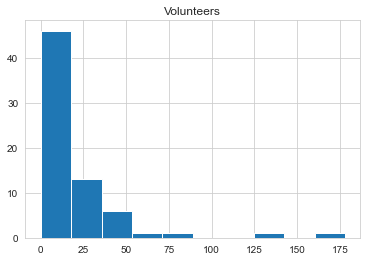

In [209]:
plt.hist(VolunteerNumbers)
plt.title('Volunteers')
plt.show()

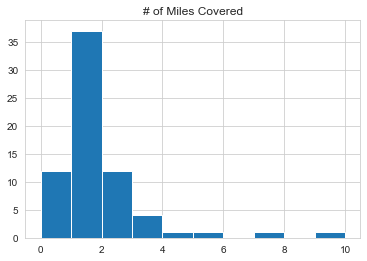

In [210]:
plt.hist(NumberofMiles)
plt.title('# of Miles Covered')
plt.show()
#From looking at histograms, the curve is left skewed so not normally distributed (leaning towards non-parametric tests)- This is because of outliers!

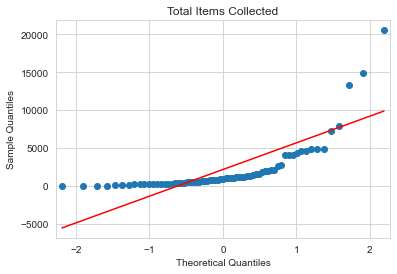

In [211]:
#Qualtile-Qualtile Plot (QQ plot)
#Generates idealized distribution (trendline) of samples that are divided into quantiles- 
#each data point in the original sample is paired with a similar member from the idealized distribution. 
#Then will be scatterplotted (x-axis idealized samples, y-axis original data samples.
# seed the random number generator
seed(1)
# generate univariate observations
# q-q plot
qqplot(TotalItemsCollected, line='s')
plt.title('Total Items Collected')
plt.show()

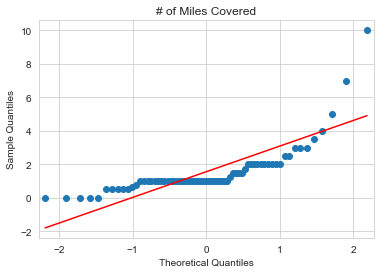

In [212]:
# seed the random number generator
seed(1)
# generate univariate observations
# q-q plot
qqplot(NumberofMiles, line='s')
plt.title('# of Miles Covered')
plt.show()

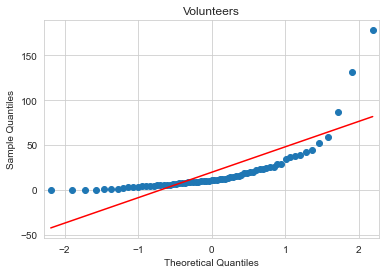

In [213]:
# seed the random number generator
seed(1)
# generate univariate observations
# q-q plot
qqplot(VolunteerNumbers, line='s')
plt.title('Volunteers')
plt.show()

#Repeating this test for all of the variables results in a similar distribution- it is not linear/not following the theoretical line. 
#Further supports using the non-parametric tests

In [214]:
#Statistical Normality Tests
#The following tests assume that that the data was drawn from a Gaussian distribution.
#H0= test is not normal

#In SciPy:
# p <= alpha: reject H0, not normal, non-parametric tests
# p > alpha: fail to reject H0, normal, parametric tests

#Different than what we are used to in science so keep in mind!
#To make it easier- combine the data we are going to test into a single dataframe in order to use a for-loop

# Using a Shapiro-Wilk (SW) Test
# Qualtifies how likely it is that the data is drawn from a Gaussian distribution
#Use for smaller data sets ( < 1000)

#Create dataframe with just data we are analyzing
TotalData = pd.concat([TotalItemsCollected,TotalPoundsofLitterCollected,VolunteerHours,VolunteerNumbers,NumberofMiles],axis="columns")
# seed the random number generator
seed(1)

for index in range(TotalData.shape[1]):
# Select column by index position using iloc[]
    columnSeriesObj = TotalData.iloc[:, index];
# normality test- and do for each column
    stat, p = shapiro(columnSeriesObj);

    print('Variable: %s, W-Stat= %.3f, p= %.3f,' % (columnSeriesObj.name, stat, p));
    # interpret         
    alpha = 0.05
    if p > alpha:
         print('Gaussian (fail to reject H0)')
  
    else:
         print('not Gaussian (reject H0)')
            
            
#Can also further use a Kolmogorov-Smirnov (KS) or Anderson-Darling (AD)Test to verify these results.
#I think it's overkill with the data we have
#If results are consistent, can move onto correlation testing

#SW usually is best in most situations, followed by AD since it considers all discrepancies compared to KS test
# More info here: https://www.tandfonline.com/doi/pdf/10.1080/00949655.2010.520163 
#So workflow of histogram -> QQ plot -> SW, AD, and/or KS test to determine parametric vs nonparametric tests.
#We will use nonparametric correlations for this data set :)


Variable: Total Items Collected, W-Stat= 0.581, p= 0.000,
not Gaussian (reject H0)
Variable: Total Pounds of Litter Collected, W-Stat= 0.511, p= 0.000,
not Gaussian (reject H0)
Variable: Volunteer Hours, W-Stat= 0.576, p= 0.000,
not Gaussian (reject H0)
Variable: Number of Volunteers, W-Stat= 0.587, p= 0.000,
not Gaussian (reject H0)
Variable: Number of Miles, W-Stat= 0.649, p= 0.000,
not Gaussian (reject H0)


In [215]:
#Tried to put resulting data into a new dataframe with For-Loop, decided it was easier to make without (hope to go over this in class!!)

stat1, p1 = shapiro(TotalItemsCollected)
stat2, p2 = shapiro(TotalPoundsofLitterCollected)
stat3, p3 = shapiro(VolunteerHours)
stat4, p4 = shapiro(VolunteerNumbers)
stat5, p5 = shapiro(NumberofMiles)

Values={'Variable':['TotalItemsCollected','TotalPoundsofLitterCollected','VolunteerHours','VolunteerNumbers','NumberofMiles'], 'W-Stat':[stat1,stat2,stat3,stat4,stat5], 'P-value':[p1,p2,p3,p4,p5],'Gaussian':['No','No','No','No','No']}
SWTestResult=pd.DataFrame(Values)
SWTestResult

Variable    W-Stat       P-value Gaussian
0           TotalItemsCollected  0.580787  9.788293e-13       No
1  TotalPoundsofLitterCollected  0.510755  8.333073e-14       No
2                VolunteerHours  0.576014  8.202528e-13       No
3              VolunteerNumbers  0.587342  1.250714e-12       No
4                 NumberofMiles  0.648866  1.441628e-11       No

In [216]:
# Non-Parametric Correlation Tests
#Spearman's Correlation coefficient is used 
# This summarizes strength between two data samples. Calculated via relative rank of values for each sample
#looking at correlations between volunteers and litter, as well as location vs litter

#TotalItemsCollected,TotalPoundsofLitterCollected,VolunteerHours,VolunteerNumbers,NumberofMiles
# seed random number generator
seed(1)

# calculate spearman's correlation
# p < 0.05 =significant correlation
# positive rho = positive correlation
# negative rho = negative correlation
rho1,p1 = spearmanr(VolunteerHours, TotalItemsCollected,alternative='two-sided')
print('Volunteer Hours vs Total Items Collected: p= %.3f, rho=%.3f' % (p1,rho1))

rho2,p2 = spearmanr(VolunteerHours, TotalPoundsofLitterCollected,alternative='two-sided')
print('Volunteer Hours vs Total lbs of Litter Collected: p= %.3f, rho=%.3f' % (p2,rho2))

rho3,p3 = spearmanr(VolunteerNumbers, TotalItemsCollected,alternative='two-sided')
print('Volunteer Numbers vs Total Items Collected: p= %.3f, rho=%.3f' % (p3,rho3))

rho4,p4 = spearmanr(VolunteerNumbers, TotalPoundsofLitterCollected,alternative='two-sided')
print('Volunteer Hours vs Total lbs of Litter Collected: p= %.3f, rho=%.3f' % (p4,rho4))

rho5,p5 = spearmanr(Date, TotalItemsCollected,alternative='two-sided')
print('Date vs Total Items Collected: p= %.3f, rho=%.3f' % (p5,rho5))

rho6,p6 = spearmanr(Date, TotalPoundsofLitterCollected,alternative='two-sided')
print('Date vs Total lbs of Litter Collected: p= %.3f, rho=%.3f' % (p6,rho6))

rho7,p7 = spearmanr(NumberofMiles, TotalItemsCollected,alternative='two-sided')
print('# of Miles vs Total Items Collected: p= %.3f, rho=%.3f' % (p7,rho7))

rho8,p8 = spearmanr(NumberofMiles, TotalPoundsofLitterCollected,alternative='two-sided')
print('# of Miles vs Total lbs of Litter Collected: p= %.3f, rho=%.3f' % (p8,rho8))

rho9,p9 = spearmanr(Date, VolunteerHours,alternative='two-sided')
print('Date vs Volunteer Hours: p= %.3f, rho=%.3f' % (p9,rho9))

rho10,p10 = spearmanr(Date, VolunteerNumbers,alternative='two-sided')
print('Date vs Volunteer Numbers: p= %.3f, rho=%.3f' % (p10,rho10))


Value={'Test':['Volunteer Hours vs Total Items Collected','Volunteer Hours vs Total lbs of Litter Collected','Volunteer Numbers vs Total Items Collected',
              'Volunteer Hours vs Total lbs of Litter Collected','Date vs Total Items Collected','Date vs Total lbs of Litter Collected',
              '# of Miles vs Total Items Collected','# of Miles vs Total lbs of Litter Collected','Date vs Volunteer Hours','Date vs Volunteer Numbers'], 
       'Rho':[rho1,rho2,rho3,rho4,rho5,rho6,rho7,rho8,rho9,rho10], 'P-value':[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10],'Significant':['Yes','Yes','Yes','Yes','No','No','Yes','Yes','No','No']}
SpearmanTestResult=pd.DataFrame(Value)
SpearmanTestResult
#There's a positive correlation- more volunteer impact & area coverage is correlated with more litter items and weight collected
#No correlation between litter and date, as well as volunteer and date

Volunteer Hours vs Total Items Collected: p= 0.000, rho=0.711
Volunteer Hours vs Total lbs of Litter Collected: p= 0.000, rho=0.636
Volunteer Numbers vs Total Items Collected: p= 0.000, rho=0.704
Volunteer Hours vs Total lbs of Litter Collected: p= 0.000, rho=0.559
Date vs Total Items Collected: p= 0.317, rho=0.122
Date vs Total lbs of Litter Collected: p= 0.578, rho=-0.068
# of Miles vs Total Items Collected: p= 0.004, rho=0.340
# of Miles vs Total lbs of Litter Collected: p= 0.000, rho=0.409
Date vs Volunteer Hours: p= 0.335, rho=0.118
Date vs Volunteer Numbers: p= 0.141, rho=0.179


Test       Rho       P-value  \
0          Volunteer Hours vs Total Items Collected  0.711424  7.335285e-12   
1  Volunteer Hours vs Total lbs of Litter Collected  0.636421  4.171265e-09   
2        Volunteer Numbers vs Total Items Collected  0.704300  1.457680e-11   
3  Volunteer Hours vs Total lbs of Litter Collected  0.558745  6.056407e-07   
4                     Date vs Total Items Collected  0.122274  3.168794e-01   
5             Date vs Total lbs of Litter Collected -0.068215  5.775717e-01   
6               # of Miles vs Total Items Collected  0.340362  4.215326e-03   
7       # of Miles vs Total lbs of Litter Collected  0.408725  4.889797e-04   
8                           Date vs Volunteer Hours  0.117898  3.346396e-01   
9                         Date vs Volunteer Numbers  0.179002  1.411154e-01   

  Significant  
0         Yes  
1         Yes  
2         Yes  
3         Yes  
4          No  
5          No  
6         Yes  
7         Yes  
8          No  
9          No

In [223]:
# Pie chart- looking at one area that stands out
#Barraud Park - see distribution of trash collected
#Need to move around data first
#Grabbing the entire row where Barraud Park data is located into a new series

BarraudParkTrash=Data.loc[Area=="Barraud Park"]

BarraudParkTrash


Area        Date  Cigarette Butts  \
3   Barraud Park  10/22/2022             1271   
13  Barraud Park  10/16/2021             2724   
31  Barraud Park  09/21/2019             3162   
40  Barraud Park  09/30/2018              699   
50  Barraud Park  09/30/2017             3639   

    Food Wrappers (candy, chips, etc.)  Take Out/Away Containers (Plastic)  \
3                                  273                                  15   
13                                 778                                  18   
31                                 342                                  31   
40                                 629                                  33   
50                                1203                                  40   

    Take Out/Away Containers (Foam)  Bottle Caps (Plastic)  \
3                                26                    742   
13                               21                    780   
31                               15                    300   
40                               23                    313   
50                              106                    549   

    Bottle Caps (Metal)  Lids (Plastic)  Straws, Stirrers  ...  \
3                  1589               6                90  ...   
13                 4332              77               368  ...   
31                 1384              56               176  ...   
40                  828              10               127  ...   
50                 6269              79               106  ...   

    Tampons/Tampon Applicators  Personal Hygiene (Clean Swell)  Foam Pieces  \
3                            0                               6           96   
13                           1                               3           47   
31                           0                               0           30   
40                           0                            2093          750   
50                           0                               0          528   

    Glass Pieces  Plastic Pieces  Total Items Collected  \
3              0              97                 4887.0   
13           754            1347                13269.5   
31           258             371                 7273.0   
40           694            7415                14830.0   
50          2806            1051                20544.0   

    Total Pounds of Litter Collected  Number of Volunteers  Volunteer Hours  \
3                                 15                    35             52.5   
13                              1100                    87            174.0   
31                               120                    29             43.5   
40                               295                    39             78.0   
50                              2545                   132            396.0   

    Number of Miles  
3               1.5  
13              3.0  
31              2.0  
40              2.0  
50              1.0  

[5 rows x 53 columns]

In [224]:
#Copying just the trash variables from Barraud Park Total series to a new dataframe

BarraundData=BarraudParkTrash[['Cigarette Butts','Food Wrappers (candy, chips, etc.)','Take Out/Away Containers (Plastic)',
                            'Take Out/Away Containers (Foam)','Bottle Caps (Plastic)','Bottle Caps (Metal)','Lids (Plastic)',
                            'Straws, Stirrers','Forks, Knives, Spoons','Beverage Bottles (Plastic)','Beverage Bottles (Glass)',
                            'Beverage Cans','Grocery Bags (Plastic)','Other Plastic Bags','Paper Bags','Cups, Plates (Paper)',
                            'Cups, Plates (Plastic)','Cups, Plates (Foam)','Fishing Buoys, Pots & Traps','Fishing Net & Pieces',
                            'Fishing Line (1 yard/meter = 1 piece)','Rope (1 yard/meter = 1 piece)','Fishing Gear (Clean Swell)',
                            '6-Pack Holders','Other Plastic/Foam Packaging','Other Plastic Bottles (oil, bleach, etc.)','Strapping Bands',
                            'Tobacco Packaging/Wrap','Other Packaging (Clean Swell)','Appliances (refrigerators, washers, etc.)','Balloons',
                            'Cigar Tips','Cigarette Lighters','Construction Materials','Fireworks','Tires','Toys','Other Trash (Clean Swell)',
                            'Condoms','Diapers','Syringes','Tampons/Tampon Applicators','Personal Hygiene (Clean Swell)','Foam Pieces',
                            'Glass Pieces','Plastic Pieces']].agg('sum')
BarraundData

Cigarette Butts                              11495.0
Food Wrappers (candy, chips, etc.)            3225.0
Take Out/Away Containers (Plastic)             137.0
Take Out/Away Containers (Foam)                191.0
Bottle Caps (Plastic)                         2684.0
Bottle Caps (Metal)                          14402.0
Lids (Plastic)                                 228.0
Straws, Stirrers                               867.0
Forks, Knives, Spoons                          280.0
Beverage Bottles (Plastic)                     842.0
Beverage Bottles (Glass)                      1530.0
Beverage Cans                                  589.0
Grocery Bags (Plastic)                         616.0
Other Plastic Bags                             921.0
Paper Bags                                     281.0
Cups, Plates (Paper)                           238.0
Cups, Plates (Plastic)                         199.0
Cups, Plates (Foam)                            460.0
Fishing Buoys, Pots & Traps                   

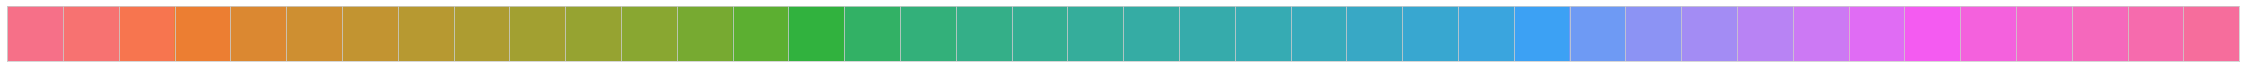

In [226]:
#colorscheme for pie chart
cmap = sb.color_palette("husl", 40, as_cmap=False)
sb.palplot(cmap)


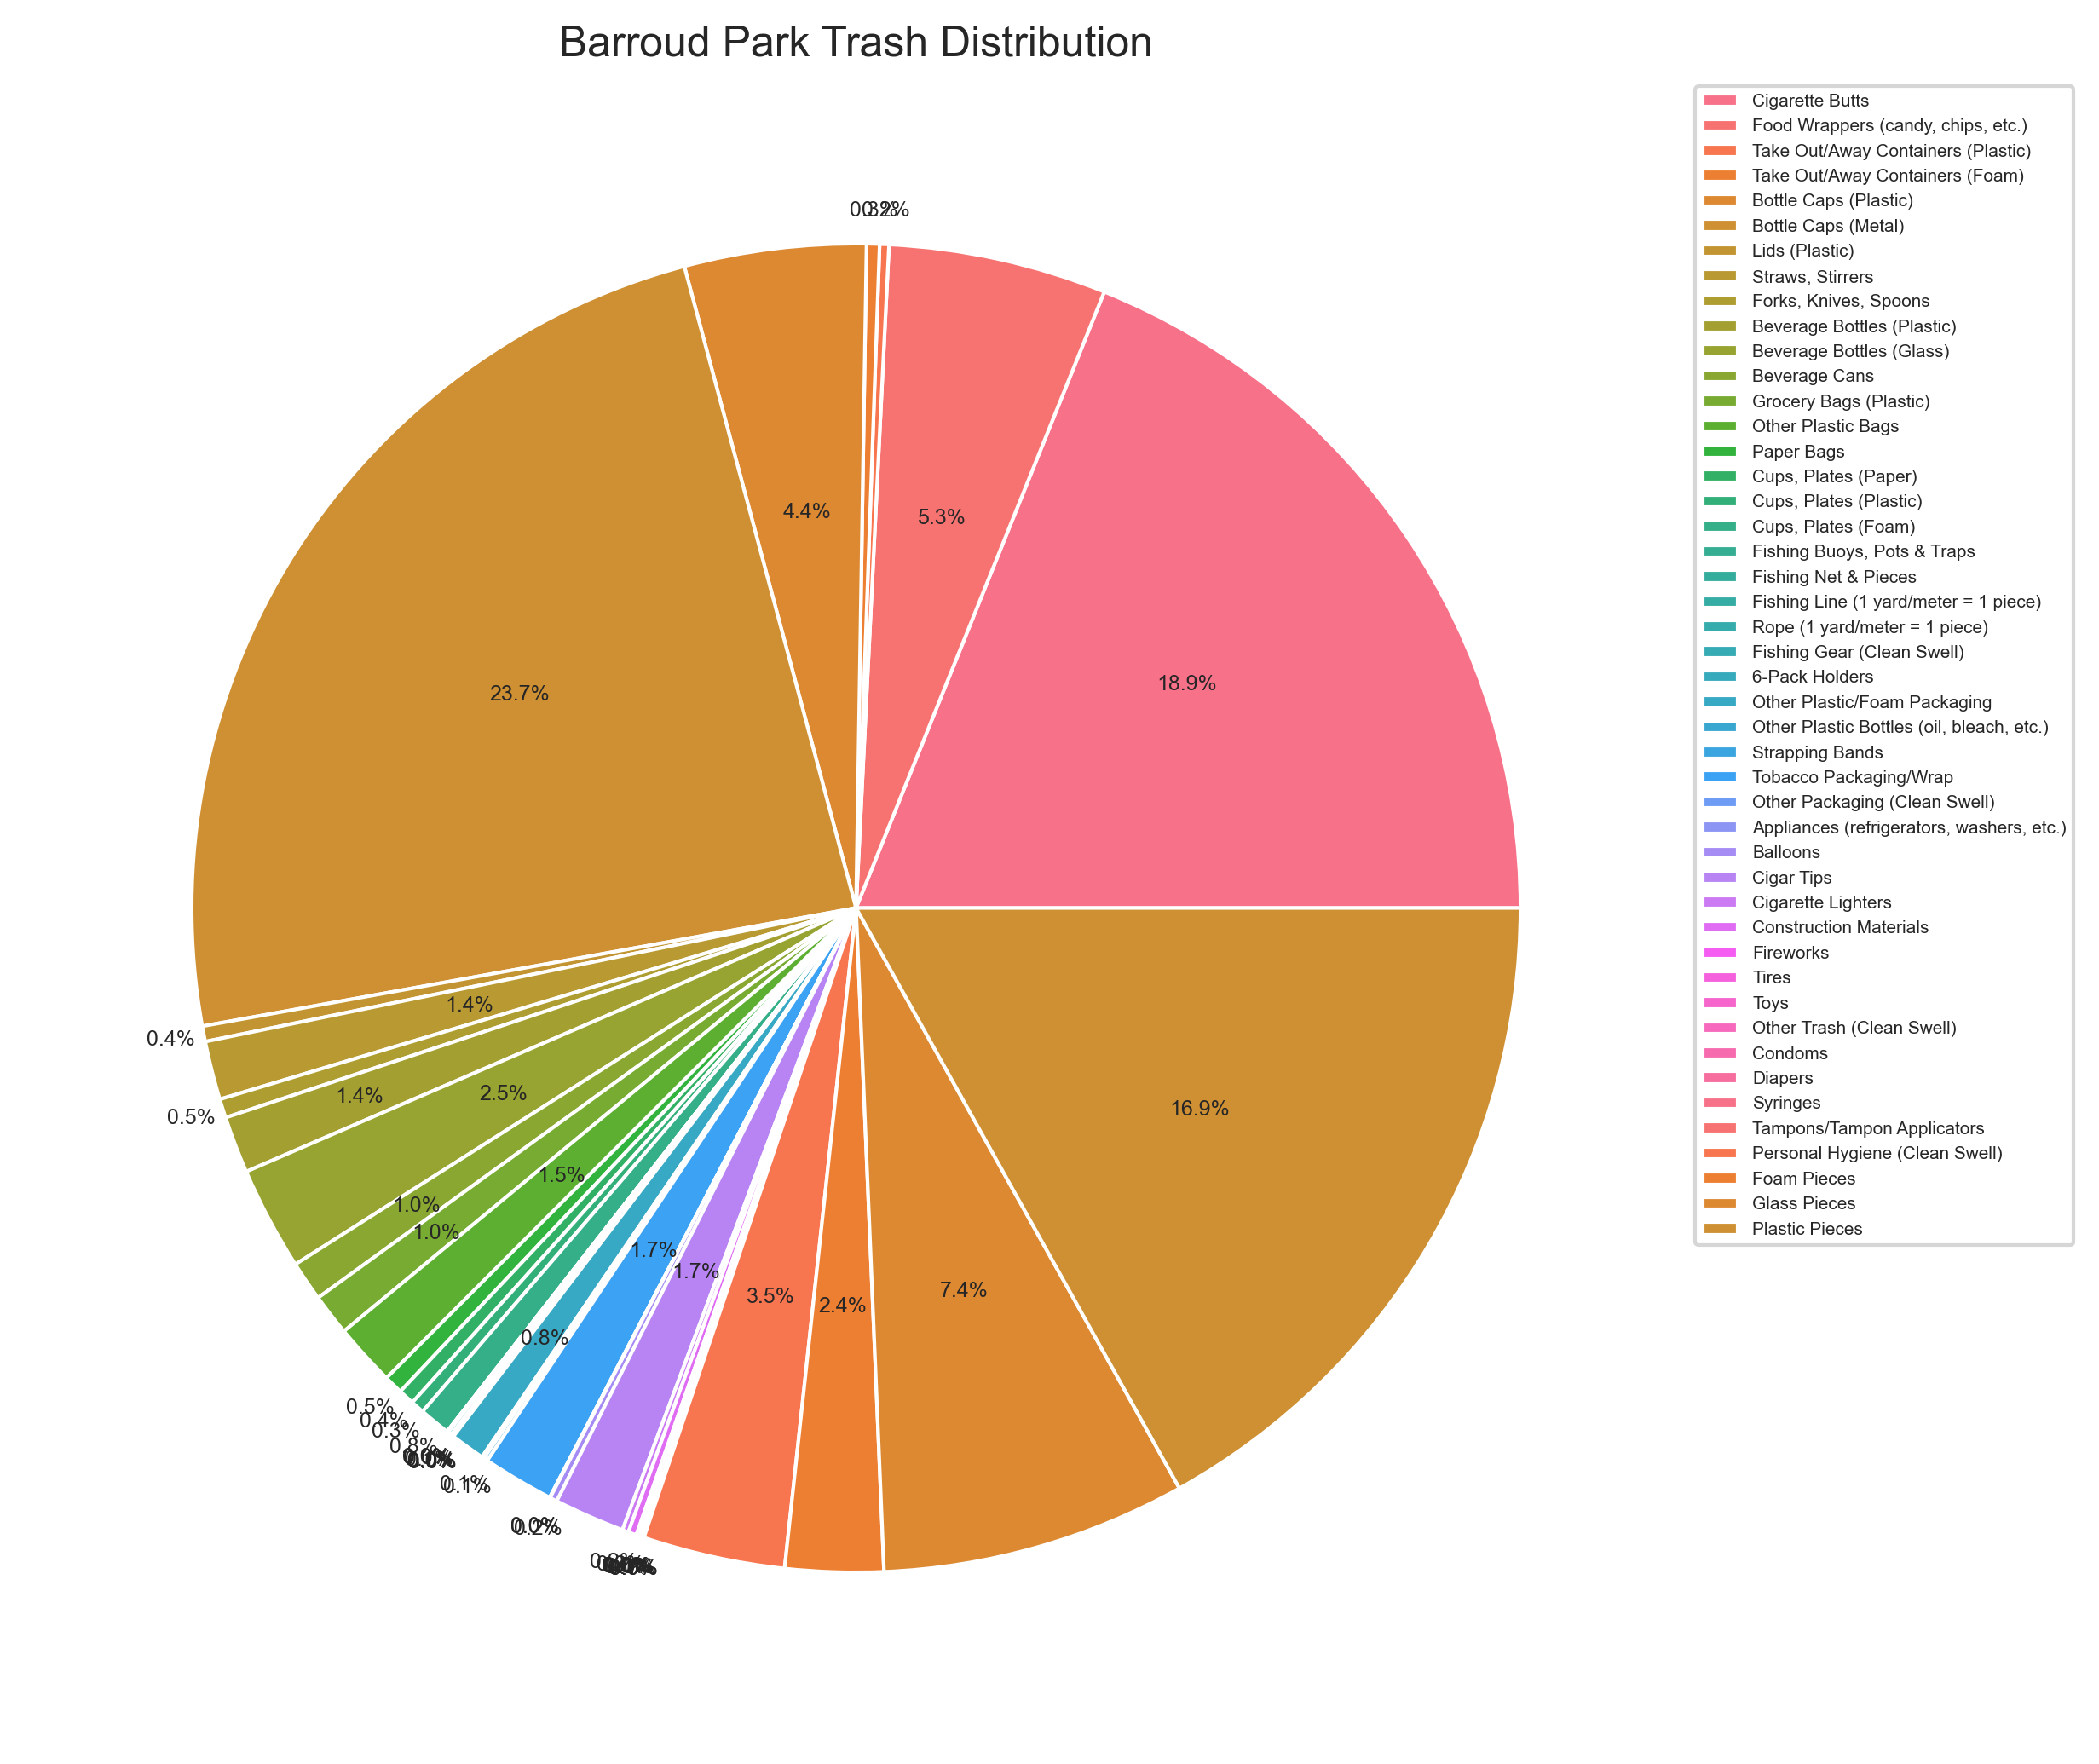

In [227]:
fig= plt.figure(figsize = (9,7), dpi = 300)
ax=fig.add_subplot(111, aspect='equal')

labels = ['Cigarette Butts','Food Wrappers (candy, chips, etc.)','Take Out/Away Containers (Plastic)',
                            'Take Out/Away Containers (Foam)','Bottle Caps (Plastic)','Bottle Caps (Metal)','Lids (Plastic)',
                            'Straws, Stirrers','Forks, Knives, Spoons','Beverage Bottles (Plastic)','Beverage Bottles (Glass)',
                            'Beverage Cans','Grocery Bags (Plastic)','Other Plastic Bags','Paper Bags','Cups, Plates (Paper)',
                            'Cups, Plates (Plastic)','Cups, Plates (Foam)','Fishing Buoys, Pots & Traps','Fishing Net & Pieces',
                            'Fishing Line (1 yard/meter = 1 piece)','Rope (1 yard/meter = 1 piece)','Fishing Gear (Clean Swell)',
                            '6-Pack Holders','Other Plastic/Foam Packaging','Other Plastic Bottles (oil, bleach, etc.)','Strapping Bands',
                            'Tobacco Packaging/Wrap','Other Packaging (Clean Swell)','Appliances (refrigerators, washers, etc.)','Balloons',
                            'Cigar Tips','Cigarette Lighters','Construction Materials','Fireworks','Tires','Toys','Other Trash (Clean Swell)',
                            'Condoms','Diapers','Syringes','Tampons/Tampon Applicators','Personal Hygiene (Clean Swell)','Foam Pieces',
                            'Glass Pieces','Plastic Pieces']

patches,texts, autotexts=plt.pie(BarraundData,colors=cmap, autopct='%1.1f%%',textprops={'fontsize': 6})

#Code adapted from https://stackoverflow.com/questions/29166508/change-autopct-label-position-on-matplotlib-pie-chart- moving % labels of pie chart
for patch, txt in zip(patches, autotexts):
    
    # the angle at which the text is located
    ang = (patch.theta2 + patch.theta1) / 2.
    
    # new coordinates of the text, 0.8 is the distance from the center 
    x1 = patch.r * 0.8 * np.cos(ang*np.pi/180)
    y1 = patch.r * 0.8 * np.sin(ang*np.pi/180)

    x2 = patch.r * 1.05 * np.cos(ang*np.pi/180)
    y2 = patch.r * 1.05 * np.sin(ang*np.pi/180)
    
    # if patch is narrow enough, move text to new coordinates
    if (patch.theta2 - patch.theta1) <= 5:
        txt.set_position((x1, y1))
    if(patch.theta2 - patch.theta1) < 3:
        txt.set_position((x2, y2))
        
plt.legend(labels,loc= 'upper left',bbox_to_anchor=(1,1),prop={'size': 5})
plt.title('Barroud Park Trash Distribution')

plt.tight_layout()

#The majority of trash collected in Barraud Park is metal bottle caps (14402 and 23.7%), 
#followed by cigarettte butts (11495, 18.9%) and then plastic pieces (10281,16.9%).
#There isn't any data about individual weight distribution but that would be interesting to see

In [222]:
#Initial Conclusions Summary

#Data is nonparametric (does not follow Gaussian distribution)- concluded from histogram, QQ-plot, and Shapiro-Wilk tests

#There is a lot of repeat locations in the data set, or locations that are close to one another. 
#Needed to combine location/area values for overall totals.
#Further research could look into the specific lat longs of each location if available

#There is 3657 different variables, where 69 are samples with 53 types of data points/variables. 
#Within the dataset, the d-types are 47 integer, 4 float, and 2 objects. 
#There is no NaN values in the dataset. 

#There is a lot of variation in the data with drastic outliers, where Barraud Park had noticble outliers in terms of trash weight/items collected,
#and volunteer numbers and hours in 2022. 
#Norfolk Collegiate (Lafayette Park-Boat Ramp) had an outlier of the most miles covered (10 miles). 

#General correlation between each of the different locations/areas and other variables (excluding dates) is positive (PCA test). 

#Specifically, Spearmans correlation and Scatterplots suggest that there's a positive correlation,
#where higher volunteer impact & area coverage is correlated with more litter items and weight collected

#There is no correlation between litter and dates, collection happened in the Fall/Winter months, 
#and even in different years there was no significant correlation
#Time of collection has no correlation with amount and weight of trash collected as well as volunteer number and hours.

#Within the Barrod Park Area (combined overall totals),
#The majority of trash collected in Barraud Park is metal bottle caps (14402 and 23.7%), 
#followed by cigarettte butts (11495, 18.9%) and then plastic pieces (10281,16.9%).
#There isn't any data about individual weight distribution but that would be interesting to see